## Reamostragem ##
* Em simulações de Monte Carlo amostramos a partir de distribuições de Probabilidade que já são assumidas ou conhecidas
* Contamos com dados históricos ou conhecimento prévio para determinar qual é a distribuição adequada para a simulação
* Na Reamostragem, amostramos aleatoriamente a partir de uma base de dados já existente
* Usamos os dados existentes implicitamente como uma distribuição de probabilidade
* Assumimos que os dados existentes são representativos da população de interesse

## Métodos de Reamostragem ##


1. Amostragem sem Reposição
  * Sorteamos uma amostra aleatória
  * Para a próxima amostra, extraimos o restante das amostras
  *

2.  Amostragem com reposição (Bootstrapping)
  * Sorteamos uma amostra aleatória
  * Coloque a de volta e retire da totalidade da amostra novamente
  * Permite estimar a distribuição amostral de quase todas as estatísticas (envolve intervalos de confiança)

3. Permutação
  * Embaralhamos a ordem dos elementos nos dados para formar uma nova amostra
  * Usada para comparar dois grupos




## Amostragem Sem Reposição ##
Queremos escolher aleatóriamente dois estados do Nordeste Brasileiro a partir de uma lista de estados. Gerando como resultado uma lista com dois estados diferentes

In [ ]:
# Vamos escolher aleatóriamente dois estados da região Nordeste do Brasil
import random
def dois_estados_ne():
  ne_estados = ['Alagoas',
                'Bahia',
                'Pernambuco',
                'Sergipe',
                'Rio Grande do Norte',
                'Maranhão',
                'Piauí',
                'Ceará',
                'Paraíba']
  return (random.sample(ne_estados,2))

In [ ]:
dois_estados_ne() #Chamando a função pela 1a vez

['Paraíba', 'Piauí']

In [ ]:
dois_estados_ne() # Chamando a função pela 2a vez

['Bahia', 'Piauí']

## Amostragem sem reposição (*Bootstrapping*)
Queremos estimar o intervalo de confiança de 95% para a altura média dos jogadores da NBA


In [ ]:
import random
import numpy as np
#Lista de Alturas
nba_alturas = [196,191,198,216,188,185,211,201,188,191,201,208,191,183,196]
alturas_simulacao = [] #Alturas da Simulacao
n = 100000 #numero de simulacoes
#Laço for para repetição das operações (Assim que simulamos algo)
for i in range(n):
  amostra_semrepo = random.choices(nba_alturas,k = 15) #k = 15 indica para extraimos 15 amostras
  alturas_simulacao.append(np.mean(amostra_semrepo))


In [ ]:
#Após simularmos 1000 vezes ou mais, extraimos os extremos
upper = np.quantile(alturas_simulacao,0.975) #Intervalo Superior
lower = np.quantile(alturas_simulacao,0.025) #Intervalo Inferior
print([np.mean(alturas_simulacao),lower,upper])

[196.27200399999998, 191.73333333333332, 201.2]


<ipython-input-25-5e18ff78471b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(alturas_simulacao)


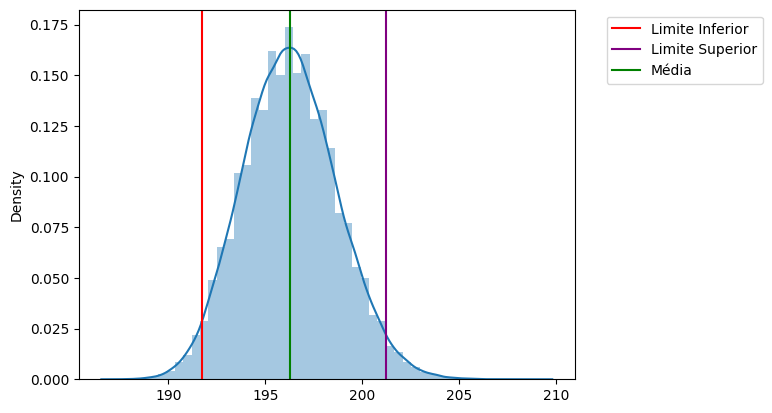

In [ ]:
#Vizualizando graficamente
import seaborn as sns
import matplotlib.pyplot as plt
#Plotando a distribuicao
sns.distplot(alturas_simulacao)
plt.axvline(191.73, color = 'red', label = 'Limite Inferior')
plt.axvline(201.2,color = 'purple', label = 'Limite Superior')
plt.axvline(196.27, color = 'green', label = 'Média')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## Permutação ##
Queremos estimar o intervalo de confiança de 95% da diferença média de alturas entre os jogadores da NBA e os homens dos USA

In [ ]:
#Listas de dados
alturas_usa = [165,185,179,187,193,180,178,179,171,176,169,160,140,199,176,185,175,196,190,176]
alturas_nba = [196,191,198,216,188,185,211,201,188,191,201,208,191,183,196]
#Assumimos inicialmente que não existe diferenças entre as alturas
alturas_tot = alturas_usa + alturas_nba #Mesclando listas
dif_simu = []
n = 10000
for i in range(n):
  amostra_permutada = np.random.permutation(alturas_tot) #Embaralha a amostra
  #Limitando os comprimentos das listas originais
  # Atribuimos os 15 primeiros elementos como novas alturas da NBA
  # E os outros 20 para a altura dos homens adultos americanos
  perm_nba,perm_adultos = amostra_permutada[0:15], amostra_permutada[15:35]
  dif_permutacao = np.mean(perm_nba) - np.mean(perm_adultos)
  dif_simu.append(dif_permutacao)

In [ ]:
#Valor da Diferença
dif_media = np.mean(alturas_nba) - np.mean(alturas_usa)

In [ ]:
#95% de confiança
upper = np.quantile(dif_simu,0.975)
lower = np.quantile(dif_simu,0.025)
print([lower,upper])

[-9.916666666666686, 9.683333333333337]


Porque a diferença esta fora desse intervalo ? Esse resultado não parece aleatório, vamos analisar graficamente

<ipython-input-36-c3880e322402>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dif_simu)


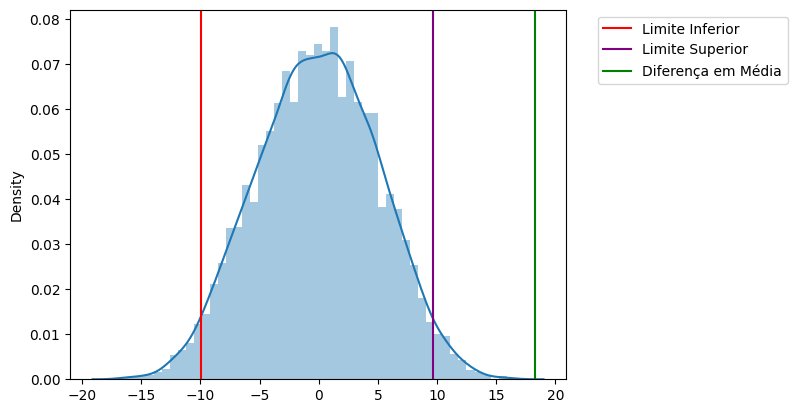

In [ ]:
#Grafico
#Plotando a distribuicao
sns.distplot(dif_simu)
plt.axvline(lower, color = 'red', label = 'Limite Inferior')
plt.axvline(upper,color = 'purple', label = 'Limite Superior')
plt.axvline(dif_media, color = 'green', label = 'Diferença em Média')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Isso se deve porque os jogadores são mais altos que o homem americano médio

## Utilizando Simulações de Monte Carlo ##
* Finanças: Preço de Ações, Gestão de Risco.
* Física: Identificação da ligação em Proteínas
* Engenharia: Modelagem Mecânica de Sistemas físicos, simula probabilidades de falha e definir domínios de segurança
## Benefícios da Simulação de Monte Carlo ##
* Levam em consideração uma faixa de valores para várias entradas
* Não mostram somente o que poderia acontecer, mas a probabilidade de cada resultado
* Facilitam a criação de gráficos com a gama de resultados possíveis em um cenário
* Permitem examinar o que teria acontecido em diferentes circunstâncias

## Exemplo: Lançaremos dois dados escolhidos de dois sacos. ##
O Objetivo da simulação é pegarmos um dado de cada saco aleatoriamente e rolamos os dois dados. Se o resultado for exatamente oito, temos sucesso, se não é um fracasso.
Podemos usar uma simulação de Monte Carlo para calcular a probabilidade de sucesso para uma combinação única de dados

In [ ]:
# Os dados estão apresentados nas listas
#cada lista representa os seis lados de um dado tendencioso
saco_1 = [[1,2,3,6,6,6],[1,2,3,4,4,6],[1,2,3,3,3,5]]
saco_2 = [[2,2,3,4,5,6],[3,3,3,4,4,5],[1,1,2,4,5,5]]

In [ ]:
#Função para os dados
import pandas as pd
def lanca_dado_tendencioso(n_tentativas):
  resultados = {}
  for i in range(n_tentativas):
    saco_index1 = random.randint(0, 2)  # Saco 1
    dado_index1 = random.randint(0, 5)  # Lado aleatório desse dado
    saco_index2 = random.randint(0, 2)  # Saco 2
    dado_index2 = random.randint(0, 5)  # Lado aleatório desse dado

    ponto_1 = saco_1[saco_index1][dado_index1]
    ponto_2 = saco_2[saco_index2][dado_index2]

    key = "%s_%s" % (ponto_1, ponto_2)  # atribui nome para cada combinação
    if ponto_1 + ponto_2 == 8:
      if key not in resultados:
        resultados[key] = 1
      else:
        resultados[key] += 1

  df_simu = pd.DataFrame.from_dict({'dado_1_dado2': resultados.keys(),'Probabilidade de Sucesso': np.array(list(resultados.values())) * 100.0 / n_tentativas})
  return df_simu


In [ ]:
#Simulando para 100000 tentativas
n_tentativas = 10000
df_simu = lanca_dado_tendencioso(n_tentativas)

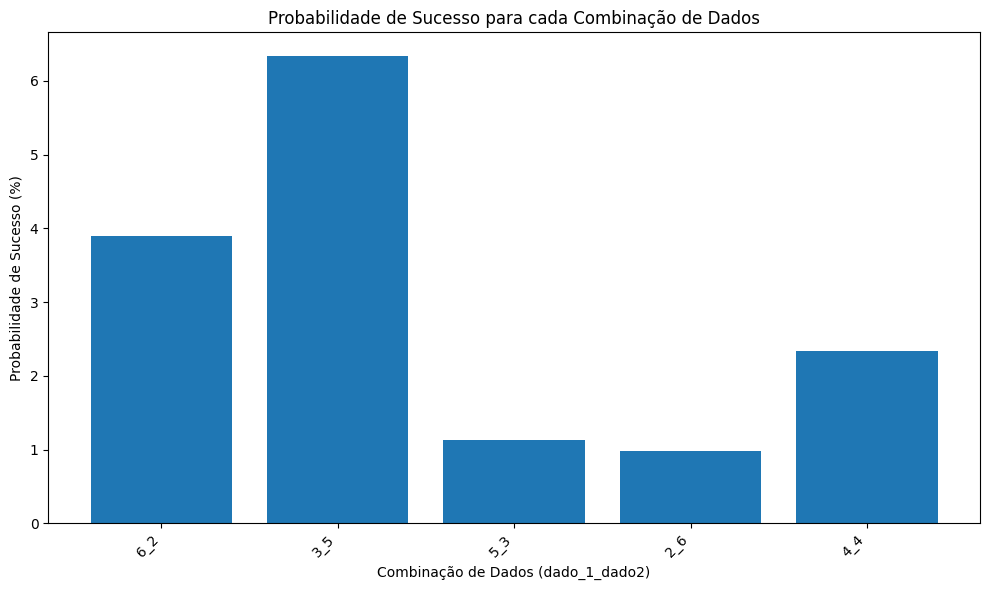

In [ ]:
#Graficamente

plt.figure(figsize=(10, 6))
plt.bar(df_simu['dado_1_dado2'], df_simu['Probabilidade de Sucesso'])
plt.xlabel('Combinação de Dados (dado_1_dado2)')
plt.ylabel('Probabilidade de Sucesso (%)')
plt.title('Probabilidade de Sucesso para cada Combinação de Dados')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Limitações das Simulações
* Podem subestimar a probabilidade de eventos extremos
* A saída de um modelo é tão boa quanto sua entrada
* Precisam ser boas imitações do sistema de interesse para produzir resultados relevantes

## Usando Simulação de Monte Carlo para calcular o valor de $\pi$

# O Processo de Monte Carlo


1.   Definimos as variáveis de entrada e escolhemos as distribuições de probabilidade corretas para essas variáveis
2.   Geramos entradas por amostragem dessas distribuições
3. Realizamos um cálculo determinístico das entradas simuladas
4. Resumimos os resultados


Para calcular o valor de $\pi$ usando o método de Monte Carlo, geramos pontos $(x, y)$ aleatórios dentro do intervalo de $-1$ a $1$.

Considerando um círculo de raio $1$ centrado na origem, a área desse círculo é igual a $\pi$ multiplicado pelo raio ao quadrado, que é $\pi$.

\begin{equation}
A_{circulo} = \pi \cdot 1^{2} \rightarrow A_{circulo} = \pi
\end{equation}

Uma vez que este círculo está inscrito em um quadrado de lado $\ell = 2$, a área do quadrado é:

\begin{equation}
A_{quadrado} = \ell^2 \rightarrow A_{quadrado} = 4
\end{equation}

Dessa forma a razão entre as duas áreas é:

\begin{equation}
\frac{A_{circulo}}{A_{quadrado}} = \frac{\pi}{4}
\end{equation}

Essa razão é equivalente à razão entre o número de pontos vermelhos (que caem dentro do círculo) e o número total de pontos gerados. Assim, podemos estimar $\pi$ usando:

\begin{equation}
\pi = 4 \cdot \frac{n_{vermelho}}{n_{todos}}
\end{equation}

Esse método aproveita a ideia de que a proporção de pontos que caem dentro do círculo para o total de pontos gerados se aproxima da razão das áreas do círculo para o quadrado, o que nos permite estimar o valor de $\pi$ de forma eficiente.

In [5]:
#Importando bibliotecas
import random
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Implementando o passo a passo
n = 10000
#Nossos pontos seguem uma distribuição uniforme de -1 a 1
pts_circulo = 0 #Pontos dentro do circulo
pts_quadrado = 0 #Pontos dentro do quadrado
#Loop para gerar os pontos
for i in range(n):
  x = random.uniform(-1,1)
  y = random.uniform(-1,1)
distancia_origem = (x**2) + (y**2)
# Adicionando pontos internos ao circulo e pontos do quadrado
if distancia_origem <= 1:
  pts_circulo += 1
pts_quadrado += 1
#Resumindo resultados
pi = 4 * (pts_circulo/pts_quadrado)
print(pi)

4.0


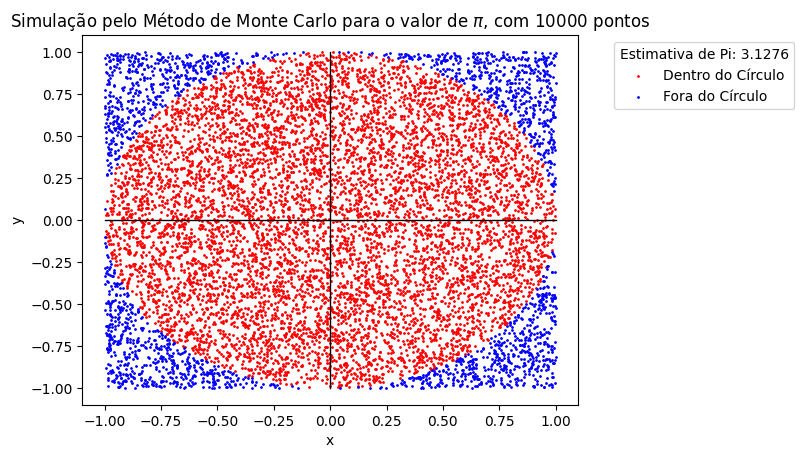

Pontos dentro do círculo: 7819
Pontos dentro do quadrado: 2181
Proporção dentro do círculo: 0.7819
Proporção dentro do quadrado: 0.2181
Estimativa de Pi: 3.1276


In [ ]:
#Gerando o Gráfico a partir da simulação
# Definição de variáveis
n = 10000
pts_circulo = 0 #Pontos dentro do circulo
pts_quadrado = 0 #Pontos dentro do quadrado

# Lista para armazenar coordenadas
x_dentro_circulo = []
y_dentro_circulo = []
x_fora_circulo = []
y_fora_circulo = []

# Loop para gerar os pontos
for i in range(n):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    distancia_origem = (x**2) + (y**2)

    # Contagem de pontos
    if distancia_origem <= 1:
        pts_circulo += 1
        x_dentro_circulo.append(x)
        y_dentro_circulo.append(y)
    else:
      pts_quadrado += 1
      x_fora_circulo.append(x)
      y_fora_circulo.append(y)

# Cálculo da estimativa de Pi
pi = 4*(pts_circulo/(pts_quadrado + pts_circulo))

# Plotando o círculo
plt.plot([-1, 1], [0, 0], color='black', linewidth=1)
plt.plot([0, 0], [-1, 1], color='black', linewidth=1)
plt.Circle((0, 0), radius=1, fill=False, color='black', linewidth=1)

# Plotando os pontos
plt.scatter(x_dentro_circulo, y_dentro_circulo, color='red', s=1.0, label='Dentro do Círculo')
plt.scatter(x_fora_circulo, y_fora_circulo, color='blue', s=1.0, label='Fora do Círculo')
# Crie uma string que contém a estimativa de Pi
pi_str = f"Estimativa de Pi: {pi}"
# Legenda
plt.legend(bbox_to_anchor=(1.45, 1.0), loc='upper right',title=f"Estimativa de Pi: {pi}")

# Título e rótulos dos eixos
plt.title(f"Simulação pelo Método de Monte Carlo para o valor de $\pi$, com {n} pontos")
plt.xlabel("x")
plt.ylabel("y")

# Ajustando os limites dos eixos
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])

# Exibindo o gráfico
plt.show()

# Resumindo resultados
print(f"Pontos dentro do círculo: {pts_circulo}")
print(f"Pontos dentro do quadrado: {pts_quadrado}")
print(f"Proporção dentro do círculo: {pts_circulo/n:.4f}")
print(f"Proporção dentro do quadrado: {pts_quadrado/n:.4f}")
print(f"Estimativa de Pi: {pi}")

In [ ]:
#Escrevendo como se fosse uma função
def estimativa_pi(n):
    pts_circulo = 0  # Pontos dentro do círculo
    pts_quadrado = 0  # Pontos dentro do quadrado

    # Loop para gerar os pontos
    for i in range(n):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        distancia_origem = (x ** 2) + (y ** 2)

        # Adicionando pontos internos ao círculo e pontos do quadrado
        if distancia_origem <= 1:
            pts_circulo += 1
        pts_quadrado += 1

    # Resumindo resultados
    pi = 4 * (pts_circulo / pts_quadrado)

    return pi

In [ ]:
n = 5000000
estimativa_pi(n)

3.1419088

## Gerando Variáveis aleatórias por meio de Distribuições de Probabilidade
Aqui nesta parte iremos gerar variáveis aleatórias discretas e contínuas, mas antes, vamos definir o que é uma variável aleatória discreta e o que é uma variável aleatória contínua.


In [2]:
#Importando as bibliotecas necessárias
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st #Gerar distribuições

### Variáveis Aleatórias Discretas:
* São variáveis aleatórias que podem ser definidas por um número específico. Isto é, uma variável aleatória que pode assumir no máximo um número contável de valores possíveis. Também podemos dizer que tais variáveis são formadas por um conjunto de valores possíveis é finito ou contavelmente infinito.
Podemos definir tais variáveis da seguinte forma:
Tomando como $\mathcal{X}$ uma variável aleatória discreta e $a$ um valor qualquer:
\begin{equation}
p(a) = P\{\mathcal{X} =a\}
\end{equation}
Em que $p(a)$ é definido como função discreta de probabilidade.
$p(a)$ é positiva para no máximo um número contável de valores de $a$, dessa forma $\mathcal{X}$ deve assumir um dos valores $x_1$,$x_2$,$\dots$
\begin{equation}
  \begin{aligned}
  p(x_i) & \geq 0 \quad \text{para} \quad i = 1,2,\ldots \\
  p(x) & = 0  \quad \text{para todos os demais valores de } x
  \end{aligned}
\end{equation}
Por fim
\begin{equation}
\sum^{\infty}_{i =1} p(x_i) =1
\end{equation}

## Distribuição Uniforme Discreta
\begin{equation}
\mathcal{X} \sim \mathcal{U}(a,b) \rightarrow P(\mathcal{X} = x) = \frac{1}{n}
\quad \text{onde} \quad a,b \in \mathbb{I},\quad \text{com} \quad b \geq a \quad \text{e}\quad n = b - a + 1
\end{equation}
* $a$ é o limite inferior, $b$ é o limite superior e $n$ é o número de valores possíveis no intervalo

*   Esta distribuição gera valores de probabilidades iguais para todos os valores dentro de um intervalo discreto determinado, ou seja,  todos os resultados no intervalo têm a mesma probabilidade de ocorrência. No entanto, vale ressaltar que a probabilidade para cada valor dentro do intervalo é $\frac{1}{n}$
somente se o intervalo contiver $n$ valores distintos.
Apenas valores inteiros são considerados
*   Distribuição ideal para verificarmos a amostragem em uma cidade onde há aproximadamente o mesmo número de crianças de três a 20 anos de idade.



<Axes: xlabel='nums', ylabel='Count'>

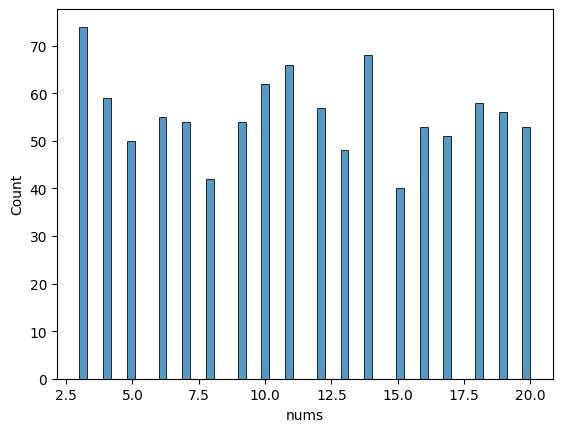

In [ ]:
#Gerando a distribuição
lim_inferior = 3
lim_superior = 21
#Gerando amostra aleatória, ela é um array NumPy
amostra = st.randint.rvs(lim_inferior,lim_superior,size = 1000)
#Na função rvs, o valor de parada não é incluido na distribuição amostrada
dict_amostra = {'nums':amostra}
sns.histplot(x = 'nums',data = dict_amostra, bins = 6, binwidth = 0.3)

Observe que os resultados da amostragem mostram que os diferentes inteiros não tem a mesma contagem. Isso acontece porque a distribuição é estocástica, isso mostra que quanto mais simulamos, mais os resultados se aproximam à distribuição de probabilidade teórica.

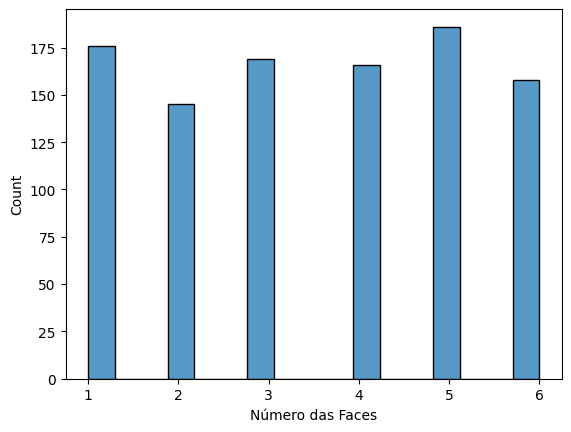

In [ ]:
# Simulando um dado com a distribuição uniforme discreta
# Define low and high for use in rvs sampling below
lim_inferior = 1 #Limite inferior
lim_superior = 7 #Limite superior, 7 porque temos 6 faces do dado
#Simule o dado sendo jogado 1000 vezes
samples_size = 1000 #Tamanho da amostra
#Gerando amostra
samples = st.randint.rvs(lim_inferior,lim_superior,size = samples_size)
samples_dict = {'Número das Faces':samples}
sns.histplot(x='Número das Faces', data=samples_dict, bins=6, binwidth=0.3)
plt.show()

# Distribuição Geométrica
A distribuição de probabilidade do número de tentativas($k$), $\mathcal{X}$, necessárias para termos um sucesso, dado a probabilidade de sucesso, $p$:
\begin{equation}
   \mathcal{X} \sim Geo(p) \rightarrow P(\mathcal{X} = k) = (1 - p)^{k-1} p,\quad 0 < p \leq 1
\end{equation}
* A Distribuição Geométrica captura o número de tentativas de prova que uma pessoa precisa para passar em um concurso, por exemplo.

<Axes: xlabel='Tentativas ($k$)', ylabel='Count'>

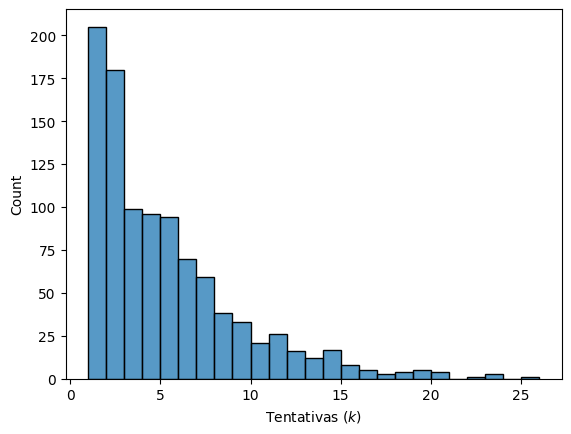

In [ ]:
#Gerando distribuição
p = 0.2 #Probabilidade de sucesso
amostra = st.geom.rvs(p,size = 1000)
amostra_dict = {'Tentativas ($k$)':amostra}
sns.histplot(x = 'Tentativas ($k$)',data = amostra_dict)

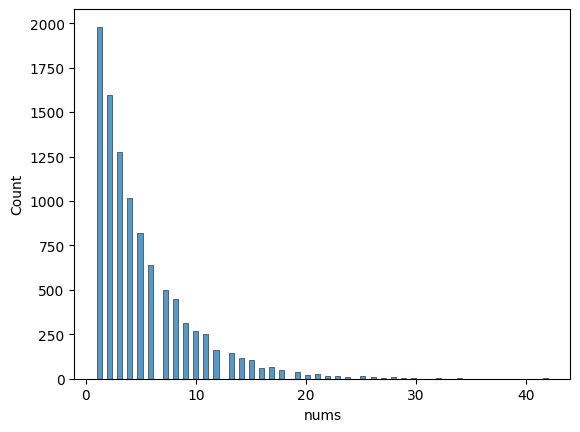

In [ ]:
# Modelando a Chance de uma moeda dar Cara
p = 0.2 #Probabilidade de Sucesso

#Montando a distribuiçao para ela jogar a moeda 10000
amostra_size = 10000 #Tamanho da amostra
amostra = st.geom.rvs(p,size = amostra_size)
amostra_dict = {"nums":amostra}
sns.histplot(x="nums", data=amostra_dict)
plt.show()

Existem muitas outras distribuições que podemos considerar:
* Distribuição de Poisson:
    
  A Distribuição de Poisson expressa a probabilidade de um determinado número de eventos($k$) ocorrerem em um intervalo fixo de tempo ou espaço se esses eventos são independentes e ocorrem com uma taxa média constante conhecida($\lambda$).
  
  \begin{equation}
  \mathcal{X} \sim Poi(\lambda) \rightarrow P(\mathcal{X} = k) = \frac{e^{-\lambda} \cdot \lambda^k}{k!}
  \end{equation}
  
  Ela pode ser implementada usando o seguinte comando:
  ```
  poisson.rvs(mu, size=tamanho_da_amostra)
  ```
  Em que mu é correspondente ao $\lambda$.
  
  Essa distribuição é frequentemente aplicada em situações onde se deseja modelar a contagem de eventos raros que ocorrem de forma independente ao longo de um intervalo fixo, como o número de chamadas recebidas por um call center em uma hora, o número de acidentes em uma estrada em um dia, entre outros.

* Distribuição Binomial

  A Distribuição Binomial é uma distribuição de probabilidade discreta que modela o número de sucessos em uma sequência de $n$ experimentos independentes, onde cada experimento tem apenas dois resultados possíveis: sucesso (com probabilidade $p$) ou fracasso (com probabilidade $1−p$). Ela é caracterizada por dois parâmetros: $n$, o número total de experimentos, e $p$, a probabilidade de sucesso em cada experimento.
  \begin{equation}
  \mathcal{X} \sim Bin(n,p) \rightarrow P(\mathcal{X} = k) = \binom{n}{k} \cdot p^k \cdot (1-p)^{n-k}
  \end{equation}
  São usadas para simular o número de sucessos em uma sequência de $n$ experimentos independentes e fixos, pode ser usada em testes de medicamentos, processos de fabricação, estudos de mercado.
  
  Sendo implementada pelo seguinte comando:
  ```
  binom.rvs(n,p,size=tamanho_da_amostra)
  ```

* Distribuição Bernoulli:
   
   Distribuição de Bernoulli é uma distribuição de probabilidade discreta que modela o resultado de um experimento aleatório com apenas dois resultados possíveis: sucesso (representado por $x$=1) e fracasso (representado por $x$=0). Ela é caracterizada por um único parâmetro $p$, que é a probabilidade de sucesso em um único ensaio.
  
  \begin{equation}
  \mathcal{X} \sim \text{Bern}(p) \rightarrow P(\mathcal{X} = x) = p^x \cdot (1 - p)^{1-x}
  \end{equation}
  
  A Distribuição de Bernoulli é um caso especial da Binomial, onde $n = 1$, sendo implementada pelo seguinte comando:
  ```
  bernoulli.rvs(p, size=tamanho_da_amostra)
  ```
  Essa distribuição é comumente utilizada em experimentos com dois resultados possíveis, como lançamento de moeda (cara ou coroa), teste de sucesso ou fracasso, entre outros, onde apenas dois resultados são observados em cada ensaio.



* Distribuição Hipergeométrica

  A distribuição hipergeométrica é uma distribuição de probabilidade discreta que modela a probabilidade de se obter um certo número de sucessos em uma amostra de tamanho $n$ retirada de uma população finita de tamanho $N$, onde a população contém $K$ elementos de interesse (sucessos).
  \begin{equation}
  \mathcal{X} \sim \text{H}(N,K,n) \rightarrow P(\mathcal{X} = k) = \frac{\binom{K}{k} \cdot \binom{N-K}{n-k}}{\binom{N}{n}}
  \end{equation}
  Onde:
  * $N$: Tamanho total da população.
  * $K$: Número total de elementos de interesse na população.
  * $n$: Tamanho da amostra retirada da população.
  Podendo ser implementada pelo seguinte código:
  ```
  hypergeom.rvs(M, n, N, size=tamanho_da_amostra)
  ```
  Onde $M$ é o equivalente ao k, $n$ é o $K$ e N é o $n$ da expressão
  Essa distribuição é comumente utilizada em diversas áreas, como em processos de amostragem em estatística, controle de qualidade, análise de lotes de produção, entre outros, onde a extração de uma amostra de uma população finita é necessária e a contagem dos elementos de interesse na amostra é relevante.
* Distribuição Zipf (Zeta):
  
  A Distribuição Zipf, também conhecida como Distribuição Zeta, é uma distribuição de probabilidade discreta que modela a frequência de ocorrência de diferentes eventos, como palavras em um texto, frequência de palavras em um idioma, popularidade de páginas da web, entre outros.
  
  \begin{equation}
  \mathcal{X} \sim Zipf(a,k) → P(\mathcal{X} = k) =  \frac{C}{k^{a+1}} \quad \text{para} \quad k = 1,2,\dots \quad \text{em que} \quad C = \left[ \sum^{\infty}_{k=1} \left( \frac{1}{k} \right)^{a + 1} \right]
  \end{equation}
  
  Porém, podemos escrever essa função de densidade de probabilidade usando a função de Riemann Zeta, da seguinte forma:
  
  \begin{equation}
  \mathcal{X} \sim Zipf(s,k) → P(\mathcal{X} = k) =  \frac{1}{\zeta (s)}\cdot k^{-s} \quad \text{para} \quad k = 1,2,\dots \quad \text{e} \quad s>1 \quad \quad \quad \text{Em que} \quad \zeta (s) = \sum^{\infty}_{k=1}\frac{1}{k^s}
  \end{equation}
  Em que o $s$ é o equivalente ao $a$ da primeira expressão

  Ela pode ser implementada usando o seguinte código:
  ```
  zipf.rvs(a, size=1000)
  ```
  
  A Distribuição Zipf é comumente utilizada em diversas áreas, como linguística, ciência da computação e economia, para modelar fenômenos onde a frequência de ocorrência dos eventos é inversamente proporcional ao seu rank (classificação), ou seja, eventos raros são mais comuns do que eventos frequentes. Por exemplo, a frequência das palavras em um texto segue frequentemente uma distribuição Zipf.

  Essa distribuição é útil para entender a distribuição de popularidade de elementos em grandes conjuntos de dados, ajudando a identificar padrões de comportamento em sistemas complexos.

* Distribuição Binomial Negativa
   
   Suponha que tentativas independentes com mesma probabilidade de sucesso $p$,
   em que $0 < p < 1$, sejam realizadas até que se acumule um total de $r$ sucessos. Se X for igual ao número de tentativas necessárias, então

   \begin{equation}
   \mathcal{X} \sim NB(r,p) → P(\mathcal{X} = k) = \binom{k + r - 1}{k}\cdot (1-p)^k\cdot p^r
   \end{equation}

   Ela pode ser implementada pelo seguinte comando

   ```
   nbinom.rvs(n, p, size=1000)
   ```
   Onde $n$ é o equivalente ao $r$ na expressão

   Essa distribuição é útil em situações onde estamos interessados no número de falhas consecutivas até que um certo número de sucessos tenha sido alcançado, como em modelos de previsão de tempo até a falha em manutenção preditiva ou em modelos de tempo até o sucesso em experimentos científicos.


 ## Variáveis Aleatórias Contínuas
* Ao contrário das discretas, as variáveis aleatórias contínuas recebem esse nome por conta de que são variáveis cujo o conjunto de valores possíveis é incontável.
Dessa forma dizemos que $\mathcal{X}$ é uma variável aleatória contínua se existir uma função não negativa $f$, definida para todo real $x \in (-∞,∞)$, que tenha a propriedade de que, para qualquer conjunto B de números reais:
\begin{equation}
P\{\mathcal{X} \in B\} = \int_{B}f(x)dx
\end{equation}
Em que $f(x)$ é definida como função densidade de probabilidade da variável aleatória $x$.

**Observação: A equação acima é válida apenas para os conjuntos
mensuráveis de $B$, que, para tal felicidade, incluem todos os conjuntos de interesse prático.**

Traduzindo a equação para português, ela diz que a probabilidade de que $\mathcal{X}$ esteja em $B$ pode ser obtida integrando-se a função densidade de probabilidade ao longo do conjunto $B$.

Como $\mathcal{X}$ deve assumir algum valor, $f(x)$ deve satisfazer:
\begin{equation}
1 = P\{\mathcal{X} \in (-\infty,\infty) \} = \int_{-\infty}^{\infty}f(x)dx
\end{equation}
Assim tudo o que se deseja saber sobre $\mathcal{X}$ pode ser respondido em termos de $f$

Por exemplo, fazendo $B = [a,b]$, temos:
\begin{equation}
P\{a \leq \mathcal{X} \geq b \} = \int_{a}^{b}f(x)dx
\end{equation}
Se fizermos $a = b$:
\begin{equation}
P\{\mathcal{X} = a \} = \int_{a}^{a}f(x)dx = 0
\end{equation}
Colocando em palavrass, essa equação diz que a probabilidade de que uma variável aleatória contínua assuma qualquer valor específico é zero. Por fim,
para uma variável aleatória contínua:
\begin{equation}
P\{\mathcal{X} < a \} = P\{\mathcal{X} \leq a \} = F(a) = \int_{-\infty}^{a}f(x)dx
\end{equation}

As variáveis aleatórias continuas mais comuns podem seguir as seguintes distribuições:

### Distribuição Normal
  A distribuição normal, também conhecida como distribuição gaussiana, é uma das mais importantes e amplamente utilizadas distribuições de probabilidade contínuas.
  
  Possuindo dois parâmetros principais, o desvio padrão ($\sigma$) e a média ($\mu$), ela pode ser descrita matematicamente como:
  
  \begin{equation}
  \mathcal{X} \sim N(\mu,\sigma) → P(\mathcal{X} = x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\left[-\frac{1}{2\sigma^2}(x-\mu)^2\right]}
  \end{equation}
Essa distribuição é simétrica em torno da média $\mu$, com a forma de sino. O parâmetro $\sigma$ controla a dispersão dos dados ao redor da média. Quanto maior o $\sigma$, mais dispersos os dados estarão.

Essa distribuição é amplamente utilizada em estatística devido à sua simplicidade e ao fato de que muitos fenômenos naturais e artificiais têm distribuições que se assemelham à distribuição normal. Por exemplo, na modelagem de fenômenos naturais, como a altura de uma população, ou em processos artificiais, como erros de medição.

Em Python, usamos o seguinte comando para gerar variáveis aleatórias normais:
```
st.norm.rvs(loc = mu, scale = sigma, size = tamanho_da_amostra)
```
Onde loc é a média $\mu$ e scale é o desvio padrão $\sigma$


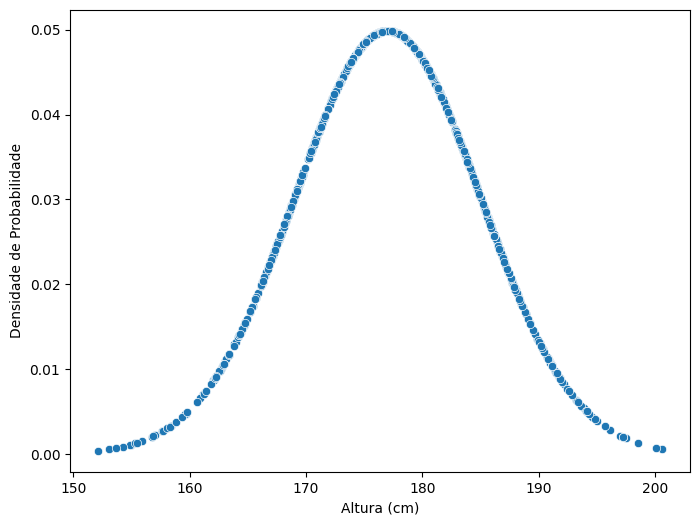

In [68]:
#Gerando as variaveis
alturas = st.norm.rvs(loc = 177, scale = 8, size = 1000)
# Calculando a PDF da distribuição normal para cada altura gerada
pdf_alturas = st.norm.pdf(alturas, loc=177, scale=8)
# Criando um DataFrame com as alturas e as densidades de probabilidade
data = {'Altura': alturas, 'Densidade de Probabilidade': pdf_alturas}
df = pd.DataFrame(data)
# Plotando o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x = df['Altura'],y = df['Densidade de Probabilidade'])
plt.xlabel('Altura (cm)')
plt.ylabel('Densidade de Probabilidade')
plt.grid(False)
plt.show()

Agora vamos alterar o desvio padrão dessa distribuição

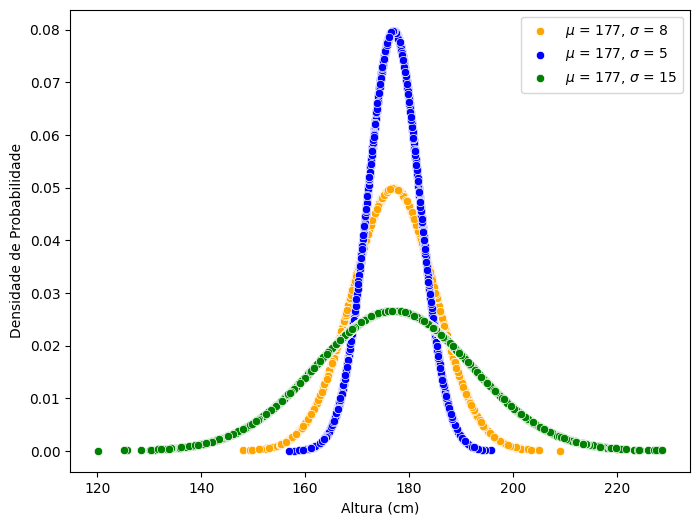

In [70]:
# Fazendo para diversos parâmetros diferentes - Alterando o desvio padrão
# Definindo os diferentes conjuntos de parâmetros
params = [(8, 'orange'), (5, 'blue'), (15, 'green')]

# Criando a figura
plt.figure(figsize=(8, 6))

# Iterando sobre os diferentes conjuntos de parâmetros
for scale, color in params:
    # Gerando as alturas aleatórias seguindo uma distribuição normal
    alturas = st.norm.rvs(loc=177, scale=scale, size=10000)
    # Calculando a PDF da distribuição normal para cada altura gerada
    pdf_alturas = st.norm.pdf(alturas, loc=177, scale=scale)
    # Plotando o gráfico de dispersão usando o Seaborn
    sns.scatterplot(x=alturas, y=pdf_alturas,color=color, label=f'$\mu$ = {177}, $\sigma$ = {scale}')
plt.xlabel('Altura (cm)')
plt.ylabel('Densidade de Probabilidade')
plt.legend(loc='upper right', fontsize='medium')
plt.show()

Se o desvio padrão for alterado de 8 para 15, a curva se torna mais plana e o pico mais largo.
Um maior desvio-padrão indica maior variação de altura para o grupo estudado

Por outro lado se o desvio padrão for diminuido de 8 para 5, a curva se torna mais acentuada e o pico mais estreito

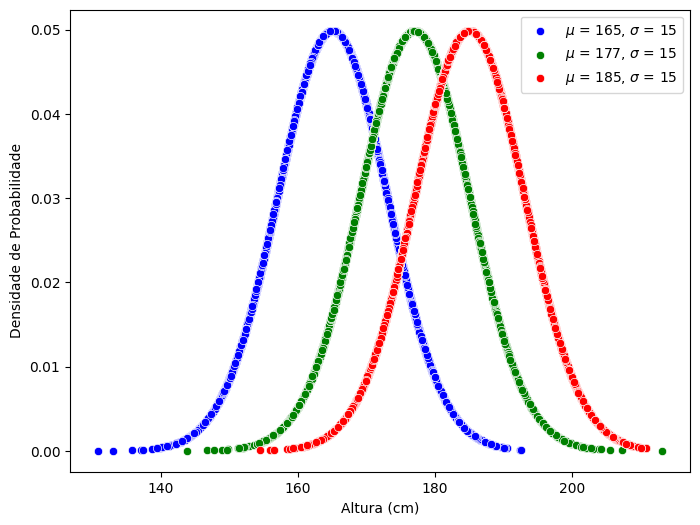

In [72]:
# Alterando a média mantendo o desvio padrão constante
# Definindo os diferentes conjuntos de parâmetros
params = [(165, 'blue'), (177, 'green'), (185, 'red')]

# Criando a figura
plt.figure(figsize=(8, 6))

# Iterando sobre os diferentes conjuntos de parâmetros
for loc, color in params:
    # Gerando as alturas aleatórias seguindo uma distribuição normal
    alturas = st.norm.rvs(loc=loc, scale=8, size=10000)
    # Calculando a PDF da distribuição normal para cada altura gerada
    pdf_alturas = st.norm.pdf(alturas, loc=loc, scale=8)
    # Plotando o gráfico de dispersão usando o Seaborn
    sns.scatterplot(x=alturas, y=pdf_alturas,color=color, label=f'$\mu$ = {loc}, $\sigma$ = {scale}')

plt.xlabel('Altura (cm)')
plt.ylabel('Densidade de Probabilidade')
plt.legend(loc='upper right', fontsize='medium')
plt.show()

Alternativamente se mantemos o desvio padrão constante e alteramos a média, temos que a largura e altura da curva não se alteram.

Porém se a média é aumentada de 177 para 185, a curva se movimenta para a direta com um centro distinto, em 185. Caso for diminuida ela se movimenta para a esquerda, tendo como centro da curva agora 165.

**Dessa forma, concluímos que a Média ($\mu$) define o pico da curva e o desvio-padrão ($\sigma$) define a altura e a largura da curva**

In [55]:
#Considerando que a altura média para adultos nos EUA é de 177 cm e o desvio padrão é 8
#Vamos determinar a porcentagem combinada de pessoas com a altura acima de 190 cm ou abaixo de 165
altura = st.norm.rvs(loc=177,scale=8,size = 10000)
qualificado = (altura < 165) | (altura > 190) #filtro, o | indica "ou"
#Porcentagem total de alturas
print(np.sum(qualificado)*100/10000)


11.79


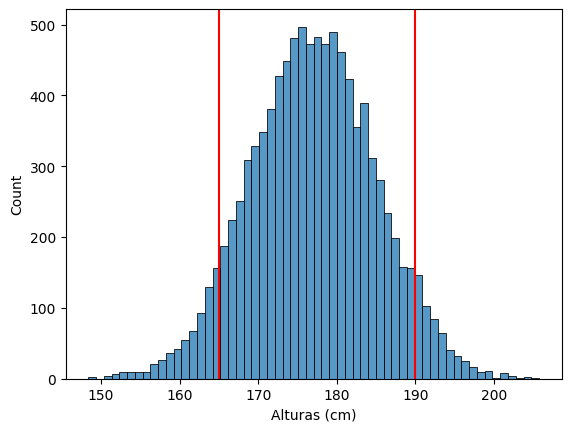

In [56]:
#Gerando o gráfico da nossa simulação
alturas_dict = {'Alturas (cm)':altura}
sns.histplot(x= 'Alturas (cm)',data = alturas_dict)
plt.axvline(x = 165,color = 'red')
plt.axvline(x = 190, color = 'red')

In [57]:
random.seed(1222)

# Sample 1,000 times from the normal distribution where the mean is 177
heights_177_8 = st.norm.rvs(loc=177,scale=8,size = 10000)
print(np.mean(heights_177_8))
upper = np.quantile(heights_177_8, 0.975)
lower = np.quantile(heights_177_8, 0.025)
print([lower, upper])

# Sample 1,000 times from the normal distribution where the mean is 185
heights_185_8 = st.norm.rvs(loc=185,scale=8,size = 10000)
print(np.mean(heights_185_8))
upper = np.quantile(heights_185_8, 0.975)
lower = np.quantile(heights_185_8, 0.025)
print([lower, upper])

177.01172632814104
[161.3454763337339, 192.7288206731245]
184.98845294154935
[169.41620469932224, 201.09992367192842]


Existem muito mais outras distribuições de variáveis aleatórias continuas entre elas temos:

* Distribuição Uniforme

  A distribuição uniforme é caracterizada por uma densidade de probabilidade constante dentro de um intervalo definido. Matematicamente, pode ser expressa como:

  \begin{equation}
  \mathcal{X} \sim U(a,b) \rightarrow P(a \leq \mathcal{X} \leq b) = \frac{1}{b - a}
  \end{equation}

  Onde $a$ e $b$ são os parâmetros que definem o intervalo.

  A distribuição uniforme é frequentemente utilizada em simulações computacionais e modelagem estatística, especialmente quando não há razão para acreditar que uma variável deva se concentrar em uma faixa específica.

  Já na amostragem aleatória, a distribuição uniforme é usada para selecionar aleatoriamente elementos de uma população, garantindo que cada elemento tenha a mesma chance de ser selecionado.

  Em alguns modelos estocásticos, como a caminhada aleatória, a distribuição uniforme é usada para modelar a incerteza associada ao próximo movimento.

  É usada em algumas técnicas estatísticas e de probabilidade, como o teste de Kolmogorov-Smirnov para verificar se uma amostra é proveniente de uma distribuição específica.

  Em algumas técnicas de criptografia, como a criptografia de chave pública, a distribuição uniforme é usada na geração de chaves aleatórias.


* Distribuição Exponencial

  A distribuição exponencial modela o tempo entre eventos em um processo de Poisson, onde os eventos ocorrem de forma contínua e independente a uma taxa média constante. Sua função de densidade de probabilidade é dada por:

  \begin{equation}
  \mathcal{X} \sim Exp(\lambda) \rightarrow f(x|\lambda) = \lambda e^{-\lambda x}
  \end{equation}

  Onde $\lambda$ é a taxa de ocorrência dos eventos.
  \begin{equation}
  A distribuição exponencial é comumente usada para modelar o tempo de vida de componentes, como lâmpadas, baterias e equipamentos eletrônicos, onde a taxa de falha é constante ao longo do tempo. Na engenharia e na análise de sistemas, a distribuição exponencial é usada para analisar a confiabilidade de sistemas e prever o tempo médio até a falha.

  Em sistemas de filas e teoria das filas, a distribuição exponencial é usada para modelar o tempo entre chegadas de clientes ou chamadas de serviço.

  Em processos de renovação, como processos de Poisson, onde eventos ocorrem continuamente e de forma independente ao longo do tempo, a distribuição exponencial é usada para modelar o tempo entre eventos sucessivos.

  A distribuição exponencial é usada em modelos financeiros e econômicos para modelar o tempo até que um evento ocorra, como o tempo até um ativo atingir um determinado preço.

  Na modelagem de tempos de espera em salas de emergência, intervalos entre crises em pacientes com epilepsia, ou tempo entre doses de medicamentos, a distribuição exponencial é comumente utilizada.



* Distribuição Gama
  
  A distribuição gama é uma generalização da distribuição exponencial, permitindo uma taxa de ocorrência variável ao longo do tempo. Sua função de densidade de probabilidade é dada por:

  \begin{equation}
  \mathcal{X} \sim Gamma(k,\theta) \rightarrow f(x|k,\theta) = \frac{1}{\Gamma(k)\theta^k} x^{k-1} e^{-\frac{x}{\theta}}
  \end{equation}

  Onde $k$ é um parâmetro de forma e $\theta$ é um parâmetro de escala.
  
  Assim como a distribuição exponencial, a distribuição gama é usada para modelar o tempo de vida de componentes e sistemas, especialmente quando a taxa de falha não é constante ao longo do tempo. Ela permite uma taxa de falha variável, o que a torna mais flexível em certos cenários.
  
  A distribuição gama é amplamente utilizada na análise de tempo até eventos, como o tempo até a falha de equipamentos, o tempo até a recuperação de pacientes após um tratamento médico, ou o tempo até a ocorrência de um evento em processos industriais.

  Em séries temporais e análise de dados de tempo, a distribuição gama é usada para modelar a distribuição de tempos entre eventos, o que pode ser útil em previsões e projeções futuras.

  Na modelagem de retornos de investimento, taxas de juros e outros fenômenos financeiros, a distribuição gama é utilizada devido à sua flexibilidade em lidar com distribuições assimétricas e pesadas nas caudas.

  Na modelagem de tempos de espera em salas de emergência, tempos entre doses de medicamentos, ou tempos até a recuperação de pacientes, a distribuição gama é utilizada devido à sua capacidade de modelar diferentes padrões de tempo.

  Em engenharia de confiabilidade, análise de sistemas complexos e modelagem de processos industriais, a distribuição gama é utilizada para lidar com a variabilidade no tempo de vida e no tempo entre eventos.


* Distribuição de Cauchy
  
  A distribuição de Cauchy é caracterizada por sua forma em sino e sua cauda longa. Sua função de densidade de probabilidade é dada por:

  \begin{equation}
  \mathcal{X} \sim Cauchy(x_0,\gamma) \rightarrow f(x|x_0,\gamma) = \frac{1}{\pi\gamma \left[1 + \left(\frac{x-x_0}{\gamma}\right)^2\right]}
  \end{equation}

  Onde $x_0$ é a mediana e $\gamma$ é o parâmetro de escala.
  
  Devido à sua cauda longa e pesada, a distribuição de Cauchy é frequentemente utilizada para modelar valores extremos e outliers em conjuntos de dados, especialmente em situações em que outras distribuições, como a normal, podem subestimar a probabilidade de eventos extremos.

  A distribuição de Cauchy é encontrada em várias áreas da física, como a teoria quântica de campos, onde é usada para modelar a distribuição de energias de ressonância, e na astronomia, onde é usada para modelar o ruído em medidas astronômicas.

  Na mecânica estatística, a distribuição de Cauchy aparece em modelos de sistemas com interações de longo alcance, como o modelo de Ising em uma dimensão e o modelo de Heisenberg unidimensional.

  Em estatística, a distribuição de Cauchy é usada em algumas técnicas de estimação de parâmetros, como a estimação por mínimos quadrados robusta, que é menos sensível a outliers do que a estimação por mínimos quadrados convencional.

  A distribuição de Cauchy aparece em alguns processos estocásticos, como o movimento browniano fracionário, que é uma generalização do movimento browniano padrão com uma variância infinita.

  Na análise de risco financeiro, a distribuição de Cauchy é usada para modelar retornos de investimento extremos e eventos de cauda pesada que podem afetar os mercados financeiros.


* Distribuição Weinbull
  
  A distribuição Weibull é frequentemente usada para modelar a vida útil de componentes ou materiais. Sua função de densidade de probabilidade é dada por:

  \begin{equation}
  \mathcal{X} \sim Weinbull(k,\lambda) \rightarrow f(x|k,\lambda) = \frac{k}{\lambda} \left(\frac{x}{\lambda}\right)^{k-1} e^{-(x/\lambda)^k}
  \end{equation}

  Onde $k$ é um parâmetro de forma e $\lambda$ é um parâmetro de escala.

  A distribuição Weibull é amplamente utilizada na engenharia de confiabilidade para modelar a vida útil de componentes e sistemas. Ela é particularmente útil quando a taxa de falha não é constante ao longo do tempo, mas segue uma tendência de decaimento ou aumento. Na análise de tempo até a falha de equipamentos, a distribuição Weibull é usada para modelar o tempo até a falha e prever a probabilidade de falha ao longo do tempo.
  
  Na medicina e nas ciências da saúde, a distribuição Weibull é utilizada para modelar a vida útil de órgãos, tecidos e dispositivos médicos, bem como para analisar a sobrevivência de pacientes em estudos clínicos.

  Na modelagem de durações de contratos, tempo até a recuperação de empréstimos e tempo até a falência de empresas, a distribuição Weibull é usada para modelar o tempo até eventos econômicos importantes.

  Na física de materiais e engenharia de materiais, a distribuição Weibull é usada para modelar a distribuição de tamanhos de falhas e defeitos em materiais, bem como para prever a probabilidade de falha de componentes estruturais.

  Na modelagem de eventos extremos, como a intensidade de tempestades e a magnitude de terremotos, a distribuição Weibull é utilizada para modelar a distribuição de eventos extremos e prever sua probabilidade de ocorrência.



* Distribuição Beta

  A distribuição beta é usada para modelar a variabilidade de dados entre um intervalo fixo de 0 a 1. Sua função de densidade de probabilidade é dada por:

  \begin{equation}
  \mathcal{X} \sim Beta(a,b) \rightarrow f(x|a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} x^{a-1} (1-x)^{b-1}
  \end{equation}

  Onde $a$ e $b$ são parâmetros de forma e $\Gamma$ é a função gama.
  
  A distribuição beta é frequentemente usada para modelar proporções e probabilidades, especialmente quando os dados estão restritos ao intervalo de 0 a 1. Por exemplo, proporções de sucessos em experimentos binomiais ou taxas de conversão em testes de marketing.

  Na inferência estatística bayesiana, a distribuição beta é utilizada como uma distribuição a priori para modelar a incerteza sobre uma proporção ou probabilidade antes de observar os dados. Após a observação dos dados, a distribuição beta é atualizada para uma distribuição a posteriori.

  A distribuição beta é usada para modelar a incerteza em uma variedade de contextos, incluindo previsões probabilísticas, simulações de Monte Carlo e análise de risco, especialmente quando a incerteza está associada a proporções ou probabilidades.

  Na estatística inferencial, a distribuição beta é utilizada para calcular intervalos de confiança e realizar testes de hipóteses para proporções e probabilidades, especialmente em casos em que o tamanho da amostra é pequeno ou desconhecido.

  Na análise de sobrevivência e modelagem de dados censurados, a distribuição beta é usada para modelar a função de sobrevivência quando a distribuição de tempos de sobrevivência é contínua e restrita ao intervalo de 0 a 1.

  Em processos estocásticos, a distribuição beta é utilizada para modelar a distribuição de probabilidades de transição em cadeias de Markov, especialmente em casos em que as probabilidades de transição estão restritas ao intervalo de 0 a 1.

## Gerando Amostragem de Distribuições Multivariadas
Agora abordaremos duas distribuições multivariadas.Mas antes, vamos definir o que é uma Distribuição Multivariada.
Perceba que até agora trabalhamos com distribuições que levam em conta somente **uma** variável aleatória. A medida que estamos interessados em analisar probabilidades de duas ou mais variáveis,definimos assim para quaisquer variáveis aleatórias $\mathcal{X}$ e $\mathcal{Y}$, definimos assim a função de distribuição de probabilidade cumulativa conjunta de $\mathcal{X}$ e $\mathcal{Y}$ como:

\begin{equation}
F(a,b) = P\{\mathcal{X} \leq a, \mathcal{Y} \leq b\} \quad \text{com} \quad -\infty < a,b < \infty
\end{equation}

Dessa forma a distribuição $\mathcal{X}$ pode ser definida a partir da distribuição conjunta de $\mathcal{X}$ e $\mathcal{Y} dessa forma:

\begin{equation}
\begin{aligned}
F_{\mathcal{X}}(a) &= P\{\mathcal{X} \leq a\} \\
&= P\{\mathcal{X} \leq a, \mathcal{Y} < \infty \} \\
&= P\left(\lim_{b \to \infty}{\mathcal{X} \leq a, \mathcal{Y} \leq b}\right) \\
&= \lim_{b \to \infty}P\{\mathcal{X} \leq a, \mathcal{Y} \leq b\} \\
& = \lim_{b \to \infty}F(a,b) \\
&\equiv F(a,\infty)
\end{aligned}
\end{equation}

Perceba que, nesse conjunto de igualdades, fizemos o uso uma vez mais do fato de que a probabilidade é uma função contínua de um conjunto (isto é, evento).
Analogamente, podemos definir a função de distribuição cumulativa de $\mathcal{Y}$ como:
\begin{equation}
\begin{aligned}
F_{\mathcal{Y}}(b) &= P\{\mathcal{Y} \leq b \} \\
& = \lim_{a \to \infty}F(a,b) \\
& \equiv F(\infty,b)
\end{aligned}
\end{equation}

As funções $F_{\mathcal{Y}}$ e $F_{\mathcal{X}}$ são chamadas também de funções marginais de $\mathcal{X}$ e $\mathcal{Y}$

Tudo o que precisamos saber sobre as probabilidades conjuntas dessas duas variáveis aleatórias pode, em tese, ser respondido em termos de sua função de distribuição conjunta. Por exemplo, imagine que queremos calcular a probabilidade conjunta de que $\mathcal{X}$ seja maior que $a$, e $\mathcal{Y}$ maior que $b$. Podemos fazer isso da seguinte forma:

\begin{equation}
\begin{aligned}
P\{\mathcal{X} > a, \mathcal{Y} > b\} &= 1 - P(\{\mathcal{X} > a, \mathcal{Y} > b\}^c) \\
&= 1 - P(\{\mathcal{X} > a\}^{c} \cup \{\mathcal{Y} > b\}^c) \\
&= 1 - P(\{\mathcal{X} \leq a\} \cup \{\mathcal{Y} \leq b\}) \\
&= 1 - [P\{\mathcal{X} \leq a\} + P\{\mathcal{Y} \leq b\} - P\{\mathcal{X} \leq a, \mathcal{Y} \leq b\}] \\
&= 1 - F_{\mathcal{X}}(a) - F_{\mathcal{Y}}(b) + F(a,b)
\end{aligned}
\end{equation}
# Variáveis Conjuntamente Discretas
No caso em que $\mathcal{X}$ e $\mathcal{Y}$ sejam variáveis aleatórias discretas, é conveniente definir a função de probabilidade discreta conjunta, ou simplesmente função de probabilidade conjunta, de $\mathcal{X}$ e $\mathcal{Y}$ como:
\begin{equation}
p(x,y) = P\{\mathcal{X} = x, \mathcal{Y} = y\}
\end{equation}

A função de distribuição marginal de $\mathcal{X}$ pode ser obtida de $p(x,y)$ por:
\begin{equation}
\begin{aligned}
p_{\mathcal{X}}(x,y) &= P\{\mathcal{X} = x\} \\
&= \sum_{y:p(x,y) >0}p(x,y)
\end{aligned}
\end{equation}

Nessa equação, $p_{\mathcal{X}}(x)$ representa a função de distribuição marginal de $\mathcal{X}$ para o valor $x$. A soma é realizada sobre todos os valores possíveis de $y$ para os quais $p(x,y)$ é maior que zero, o que garante que apenas os valores relevantes de $y$ sejam incluídos na margem.

Analogamente, para $\mathcal{Y}$:
\begin{equation}
\begin{aligned}
p_{\mathcal{Y}}(x,y) &= P\{\mathcal{Y} = y\} \\
&= \sum_{x:p(x,y) >0}p(x,y)
\end{aligned}
\end{equation}

## Variáveis Conjuntamente Contínuas

Dizemos que $\mathcal{X}$ e $\mathcal{Y}$ são conjuntamente contínuas se existe uma função $f(x,y) \in \mathbb{R}$, com a probabilidade de que para todo conjunto $C$ de pares de números reais, isto é, $C$ é um conjunto no plano bidimensional.

\begin{equation}
P\{(\mathcal{X},\mathcal{Y}) \in C\} = \iint\limits_{(x,y) \in C}f(x,y)dxdy
\end{equation}

A função $f(x,y)$ é chamada de função densidade de probabilidade conjunta de $\mathcal{X}$ e $\mathcal{Y}$. Se $A$ e $B$ são quaiser conjuntos de números reais, então, definindo $C = \{(x,y): x \in A, y \in B\}$. Vemos da equação acima que:

\begin{equation}
P\{(\mathcal{X} \in A ,\mathcal{Y} \in B)\} \int_{B} \int_{A} f(x,y) dxdy
\end{equation}

Como

\begin{equation}
\begin{aligned}
F(a,b) &= P\{\mathcal{X} \in (-\infty,a], \mathcal{Y} \in (-\infty,b] \} \\
&= \int^{b}_{-\infty} \int^{a}_{-\infty} f(x,y)dxdy
\end{aligned}
\end{equation}

Calculando as derivadas:

\begin{equation}
f(a,b) = \dfrac{\partial^{2}}{\partial a \partial b}F(a,b)
\end{equation}

Sempre que as derivadas parciais forem definidas, outra interpretação para a função densidade de probabilidade conjunta é:

\begin{equation}
\begin{aligned}
P\{a < \mathcal{X} < a + da,b < \mathcal{Y} < b + db\} &= \int^{b}_{b+db} \int^{a}_{a+da}f(x,y)dxdy \\
&≈ f(a,b)dadb
\end{aligned}
\end{equation}

Onde $da$ e $db$ são pequenos e $f(x,y)$ é contínua em $a,b$. Com isso, $f(a,b)$ é uma medida de quão provável é a presença do vetor aleatório $(\mathcal{X},\mathcal{Y})$ na vizinhança de $(a,b)$

Se $\mathcal{X}$ e $\mathcal{Y}$ são variáveis aleatórias conjuntamente contínuas, elas são individualmente contínuas, e suas funções densidade de probabilidade podem ser obtidas da seguinte maneira:

\begin{equation}
\begin{aligned}
P\{\mathcal{X} \in A\} &= P\{\mathcal{X} \in A, \mathcal{Y} \in (-\infty, \infty)\} \\
&= \int_{A} \int_{-\infty}^{\infty} f(x,y) \, dy \, dx \\
&= \int_{A} f_{\mathcal{X}}(x) \, dx
\end{aligned}
\end{equation}

Onde
\begin{equation}
f_{\mathcal{X}}(x) = \int_{-\infty}^{\infty}f(x,y)dy
\end{equation}

É a função densidade de probabilidade de $\mathcal{X}$, analogamente para $\mathcal{Y}$:
\begin{equation}
f_{\mathcal{Y}}(y) = \int_{-\infty}^{\infty}f(x,y)dx
\end{equation}

## Após essa pequena definição, iremos trabalhar com as seguintes distribuições multivariadas

* Distribuição Multinomial

  É usada para simular variáveis que seguem uma distribuição binomial, sendo assim uma **Distribuição Conjuntamente Discreta**
  As probabilidades dessas variáveis quando são somadas, resultam em $1$.
  
  Por exemplo, poderiamos usar a distribuição multinomial para simular os resultados do lançamento de uma moeda viciada.

  A Distribuição Multinomial pode ser escrita com base na seguinte expressão:
  \begin{equation}
  \mathcal{X} \sim \text{Multinomial}(n, p_1, p_2, \ldots, p_k) \rightarrow
  p(x_1, x_2, \ldots, x_k | n, p_1, p_2, \ldots, p_k) = \frac{n!}{x_1! x_2! \ldots x_k!} p_1^{x_1} p_2^{x_2} \ldots p_k^{x_k}
  \end{equation}

  E pode ser implementada com o seguinte código em que $n$ é o número de ensaios, $p$ é o vetor de probabilidades e $size$ é o tamanho da sua amostra

  ```
  scipy.stats.multinomial.rvs(n,p,size)
  ```
* Distribuição Normal Multivariada
  
  Essa distribuição pode ser usada para simular variáveis que seguem a distribuição normal,suas distribuições podem ser correlacionadas umas com as outras ou não.

  Podemos usar essa distribuição para simular o preço e a demanda de um produto.
  \begin{equation}
  \mathcal{X} \sim \text{Normal}_d (\mathbf{\mu}, \mathbf{\Sigma}) = f(\mathbf{x} | \mathbf{\mu}, \mathbf{\Sigma}) = \frac{1}{(2\pi)^{d/2} |\mathbf{\Sigma}|^{1/2}}\cdot e^{\left( -\frac{1}{2} (\mathbf{x} - \mathbf{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
  \end{equation}

  Ela pode ser implementada usando o seguinte código:
  ```  
  scipy.stats.multivariate_normal.rvs(mean,size)
  ```
  Em que $mean$ é o seu vetor de médias, e $size$ é o tamanho da sua amostra







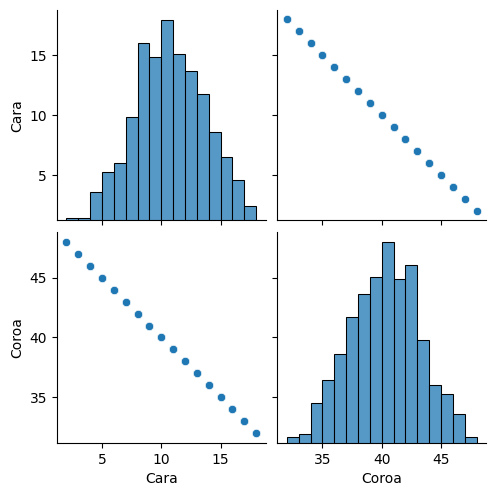

In [5]:
#Considerando que temos uma moeda viciada com 20% de probabilidade de dar cara
#E 80% de probabilidade de dar coroa
#Pedimos a 500 pessoas para girar a moeda 50 vezes cada
resultados = st.multinomial.rvs(50,[0.2,0.8],size = 500)
#Fazendo o pairplot para os resultados
df_resultados = pd.DataFrame({'Cara':resultados[:, 0],
                              "Coroa":resultados[:, 1]})
#Gráfico
sns.pairplot(df_resultados)

Os Histogramas nos quadrantes esquerdo e inferior direito mostram a distribuição do número de caras e coroas, respectivamente.
Já o gráfico de dispersão nos quadrantes inferior esquerdo e superior direito indicam que os resultados são perfeitamente correlacionados negativamente para as duas variáveis, isto é, se cara não for lançada, então o lançamento deve ter sido coroa.

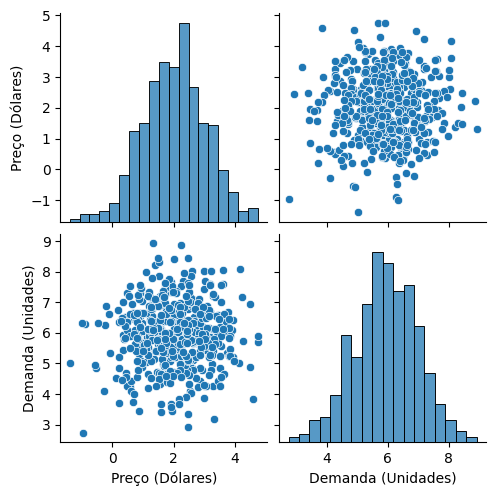

In [7]:
#Simulando uma distribuição normal multivariada
#Suponha que desejamos simular o preço e a demanda de um produto
#a média de preço é dois dolares e a média de demanda é de 6 unidades
resultados = st.multivariate_normal.rvs(mean = [2,6], size = 500)
df_pd = pd.DataFrame({'Preço (Dólares)':resultados[:, 0],
                      'Demanda (Unidades)':resultados[:, 1]})
sns.pairplot(df_pd)

* Os Histogramas nos quadrantes esquerdo e inferior direito mostram a distribuição do preço e da demanda, respectivamente.

* Já o gráfico de dispersão nos quadrantes inferior esquerdo e superior direito indicam que os resultados não são correlacionados porque são amostradas de forma independente

## Matriz de Covariância
Na verdade, dentro da teoria econômica, preço e demanda são negativamente correlacionados, isto é, o preço sobe acarretando em uma diminuição da demanda, analogamente, se o preço cai, por consequência, a demanda aumenta. Porém, como podemos mostrar isso na nossa simulação ?

Podemos usar uma matriz de covariância para capturar a variância e a covariância das variáveis.

Pense em uma matriz de covariância como um número do pairplot do item anterior, onde os historgramas exibem a variância e os gráficos de dispersão mostram a correlação

Podemos definir matematicamente uma matriz de covariância da seguinte forma:
\begin{equation}
\sigma_{xy} =
\begin{bmatrix}
\text{Var}(x) & \text{Cov}(x, y) \\
\text{Cov}(y, x) & \text{Var}(y)
\end{bmatrix}
\end{equation}

A matriz de covariância, representada por $\sigma$ ou $\sigma_{xy}$ no caso de duas variáveis $x$ e $y$, serve para quantificar a relação linear entre as variáveis e a dispersão dos dados em cada uma delas.


*   **Covariância entre  $x$ e $y$**: Os elementos fora da diagonal principal da matriz representam a covariância entre as variáveis. Se a covariância é positiva, isso indica que as variáveis tendem a se mover na mesma direção linear (ou seja, quando uma aumenta, a outra tende a aumentar também). Se a covariância é negativa, indica que as variáveis tendem a se mover em direções opostas. Se a covariância é zero, indica que não há relação linear entre as variáveis.
*   **Variância de  $x$ e  $y$**: Os elementos na diagonal principal da matriz representam a variância de cada variável. A variância mede a dispersão dos dados em torno da média. Quanto maior a variância, mais dispersos os dados estarão ao redor da média.


A matriz de covariância é fundamental na análise multivariada de dados, pois fornece informações importantes sobre a relação entre variáveis e a variabilidade dos dados. Ela é frequentemente usada em estatística descritiva, análise de regressão, análise de componentes principais e outras técnicas estatísticas.



In [ ]:
#Suponha que temos um dataframe com o histórico de preço e demanda
#Podemos ver a matriz de covariância usando o seguinte comando do Pandas
df_historico.cov() #o .cov calcula a matriz de covariância

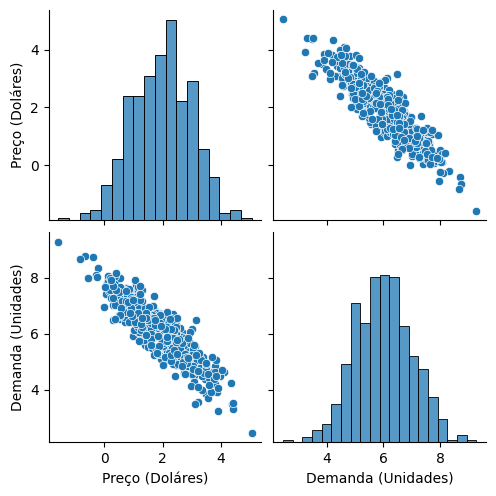

In [13]:
#Agora como podemos simular com a covariância definida ?
#Da seguinte forma:
cov_matriz = np.array([[1,-0.9],[-0.9,1]]) #Definimos a matriz
preco_demanda_sim = st.multivariate_normal.rvs(mean = [2,6], #média
                                    size = 500, # tamanho da amostra
                                    cov = cov_matriz) #Passamos a matriz com o argumento cov
df_sim = pd.DataFrame({'Preço (Doláres)':preco_demanda_sim[:,0],
                       "Demanda (Unidades)":preco_demanda_sim[:,1]})
sns.pairplot(df_sim)


# Exercício de Aplicação 1 - Amostra Multinomial

Imagine uma pequena cidade no Colorado, EUA, que tem, em média, 300 dias ensolarados, 35 dias nublados e 30 dias chuvosos a cada ano. Como cientista estudando mudanças climáticas, você está interessado nas distribuições de dias ensolarados, nublados e chuvosos em um intervalo aleatório de 50 anos, se essas médias forem assumidas como permanecendo as mesmas.

Com base nisso execute:
* Defina as probabilidades de dias de sol, nublados e chuvosos.

* Usando a função .rvs() com a distribuição correta do SciPy, simule resultados para cada variável.

* Complete a definição de df_days para que sns.pairplot() exiba corretamente os resultados da simulação.

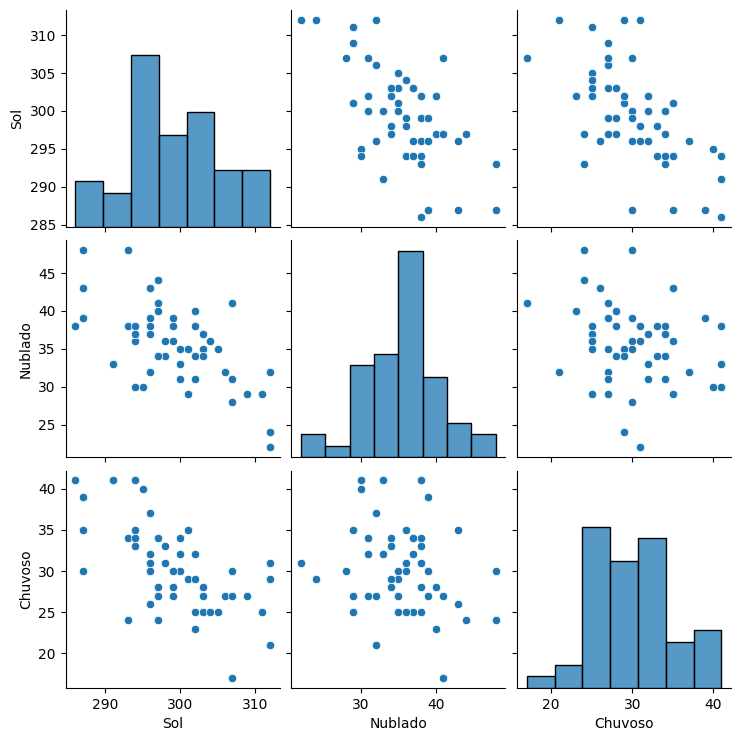

In [14]:
#Definindo as probabilidades de clima
p_sol = 300/365
p_nublado = 35/365
p_chuva = 30/365
num_dias_em_um_ano = 365
numero_anos = 50

#Simulando resultados
clima = st.multinomial.rvs(num_dias_em_um_ano,[p_sol,p_nublado,p_chuva], size = numero_anos)

#Completando a simulação criando o df_clima
df_clima = pd.DataFrame({'Sol':clima[:,0],
                         'Nublado':clima[:,1],
                         'Chuvoso':clima[:,2]})
sns.pairplot(df_clima)
plt.show()


# Exercício de Aplicação 2 - Normal Multivariada

Após explorar o DataFrame house_price_size, você suspeita que esta seja uma distribuição normal multivariada, pois o preço e o tamanho parecem seguir uma distribuição normal cada. Com base na matriz de covariância que você calculou no exercício anterior, agora você pode realizar amostragem de distribuição normal multivariada com uma estrutura de covariância definida!

Para realizar amostragem de distribuição normal multivariada com covariância definida, você precisará das seguintes informações:

* O preço tem uma média de 20 e o tamanho tem uma média de 500
* O preço tem uma variância de 19 e o tamanho tem uma variância de 50.000
* A covariância entre preço e tamanho é 950
Você fará 5.000 amostras



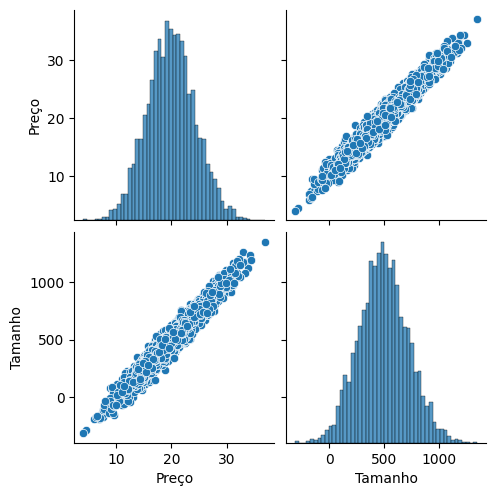

In [15]:
#Complete os parâmetros para as seguintes variáveis
media = [20,500] #vetor de médias
matriz_cov = np.array([[19,950],[950,50000]])
tamanho_amostra = 5000
#Simulando os resultados
resultados_sim = st.multivariate_normal.rvs(mean = media, #média
                                    size = tamanho_amostra, # tamanho da amostra
                                    cov = matriz_cov) #Passamos a matriz com o argumento cov
simulacao_casa_preco_tamanho = pd.DataFrame({'Preço':resultados_sim[:,0],
                                             'Tamanho':resultados_sim[:,1]})
#Vizualizando os resultados
sns.pairplot(simulacao_casa_preco_tamanho)
plt.show()

## Simulação de Monte Carlo com Princípios

## Explorando os dados
O primeiro apsso é explorar completamente os dados que queremos analisar e simular, compreender as variáveis dependentes e independentes do nosso problema, bem como suas relações.

* Nessa parte iremos usar um dataset público sobre diabetes, usaremos a Simulação de Monte Carlo para entender o impacto dos preditores de diabetes na resposta.

* O conjunto de dados tem dez variáveis independentes, ou preditores:
** Idade (age)
** Sexo (sex)
** Índice de Massa Corporal (bmi)
** Pressão Arterial Média (bp)
** Seis Medições de Soro Sanguíneo: tc,ldl,hdl,tch,ltg,glu

* A resposta também conhecida como varíavel depentende, $y$, é uma medida quantitativa da progressão da doença um ano após a linha de base.

* Existem 442 pacientes com diabetes nesse conjunto de dados

### Objetivos da Exploração

Antes de analisarmos os nossos dados sobre diabetes, iremos discutir e esclarencer os objetivos da nossa exploração.

* Queremos inspecionar visualmente a distribuição das variáveis, que nos dão o caminho sobre qual distribuição usar na Simulação.

* Precisamos verificar e medir a correlação entre os preditores. Fornecendo justificativas para modelar as estrturas de covariância entre eles.

* Precisamos analisar também a correlação entre os preditores e a resposta. Proporcionando uma compreensão inicial da relação entre elas.






In [96]:
#importando o dataframe
df = pd.read_csv('/content/diabetes.csv')

#Vendo as 10 primeiras linhas do dataframe
print(df.head())


   age  sex   bmi     bp   tc    ldl   hdl  tch     ltg  glu    y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598   87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918   69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728   85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903   89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905   80  135


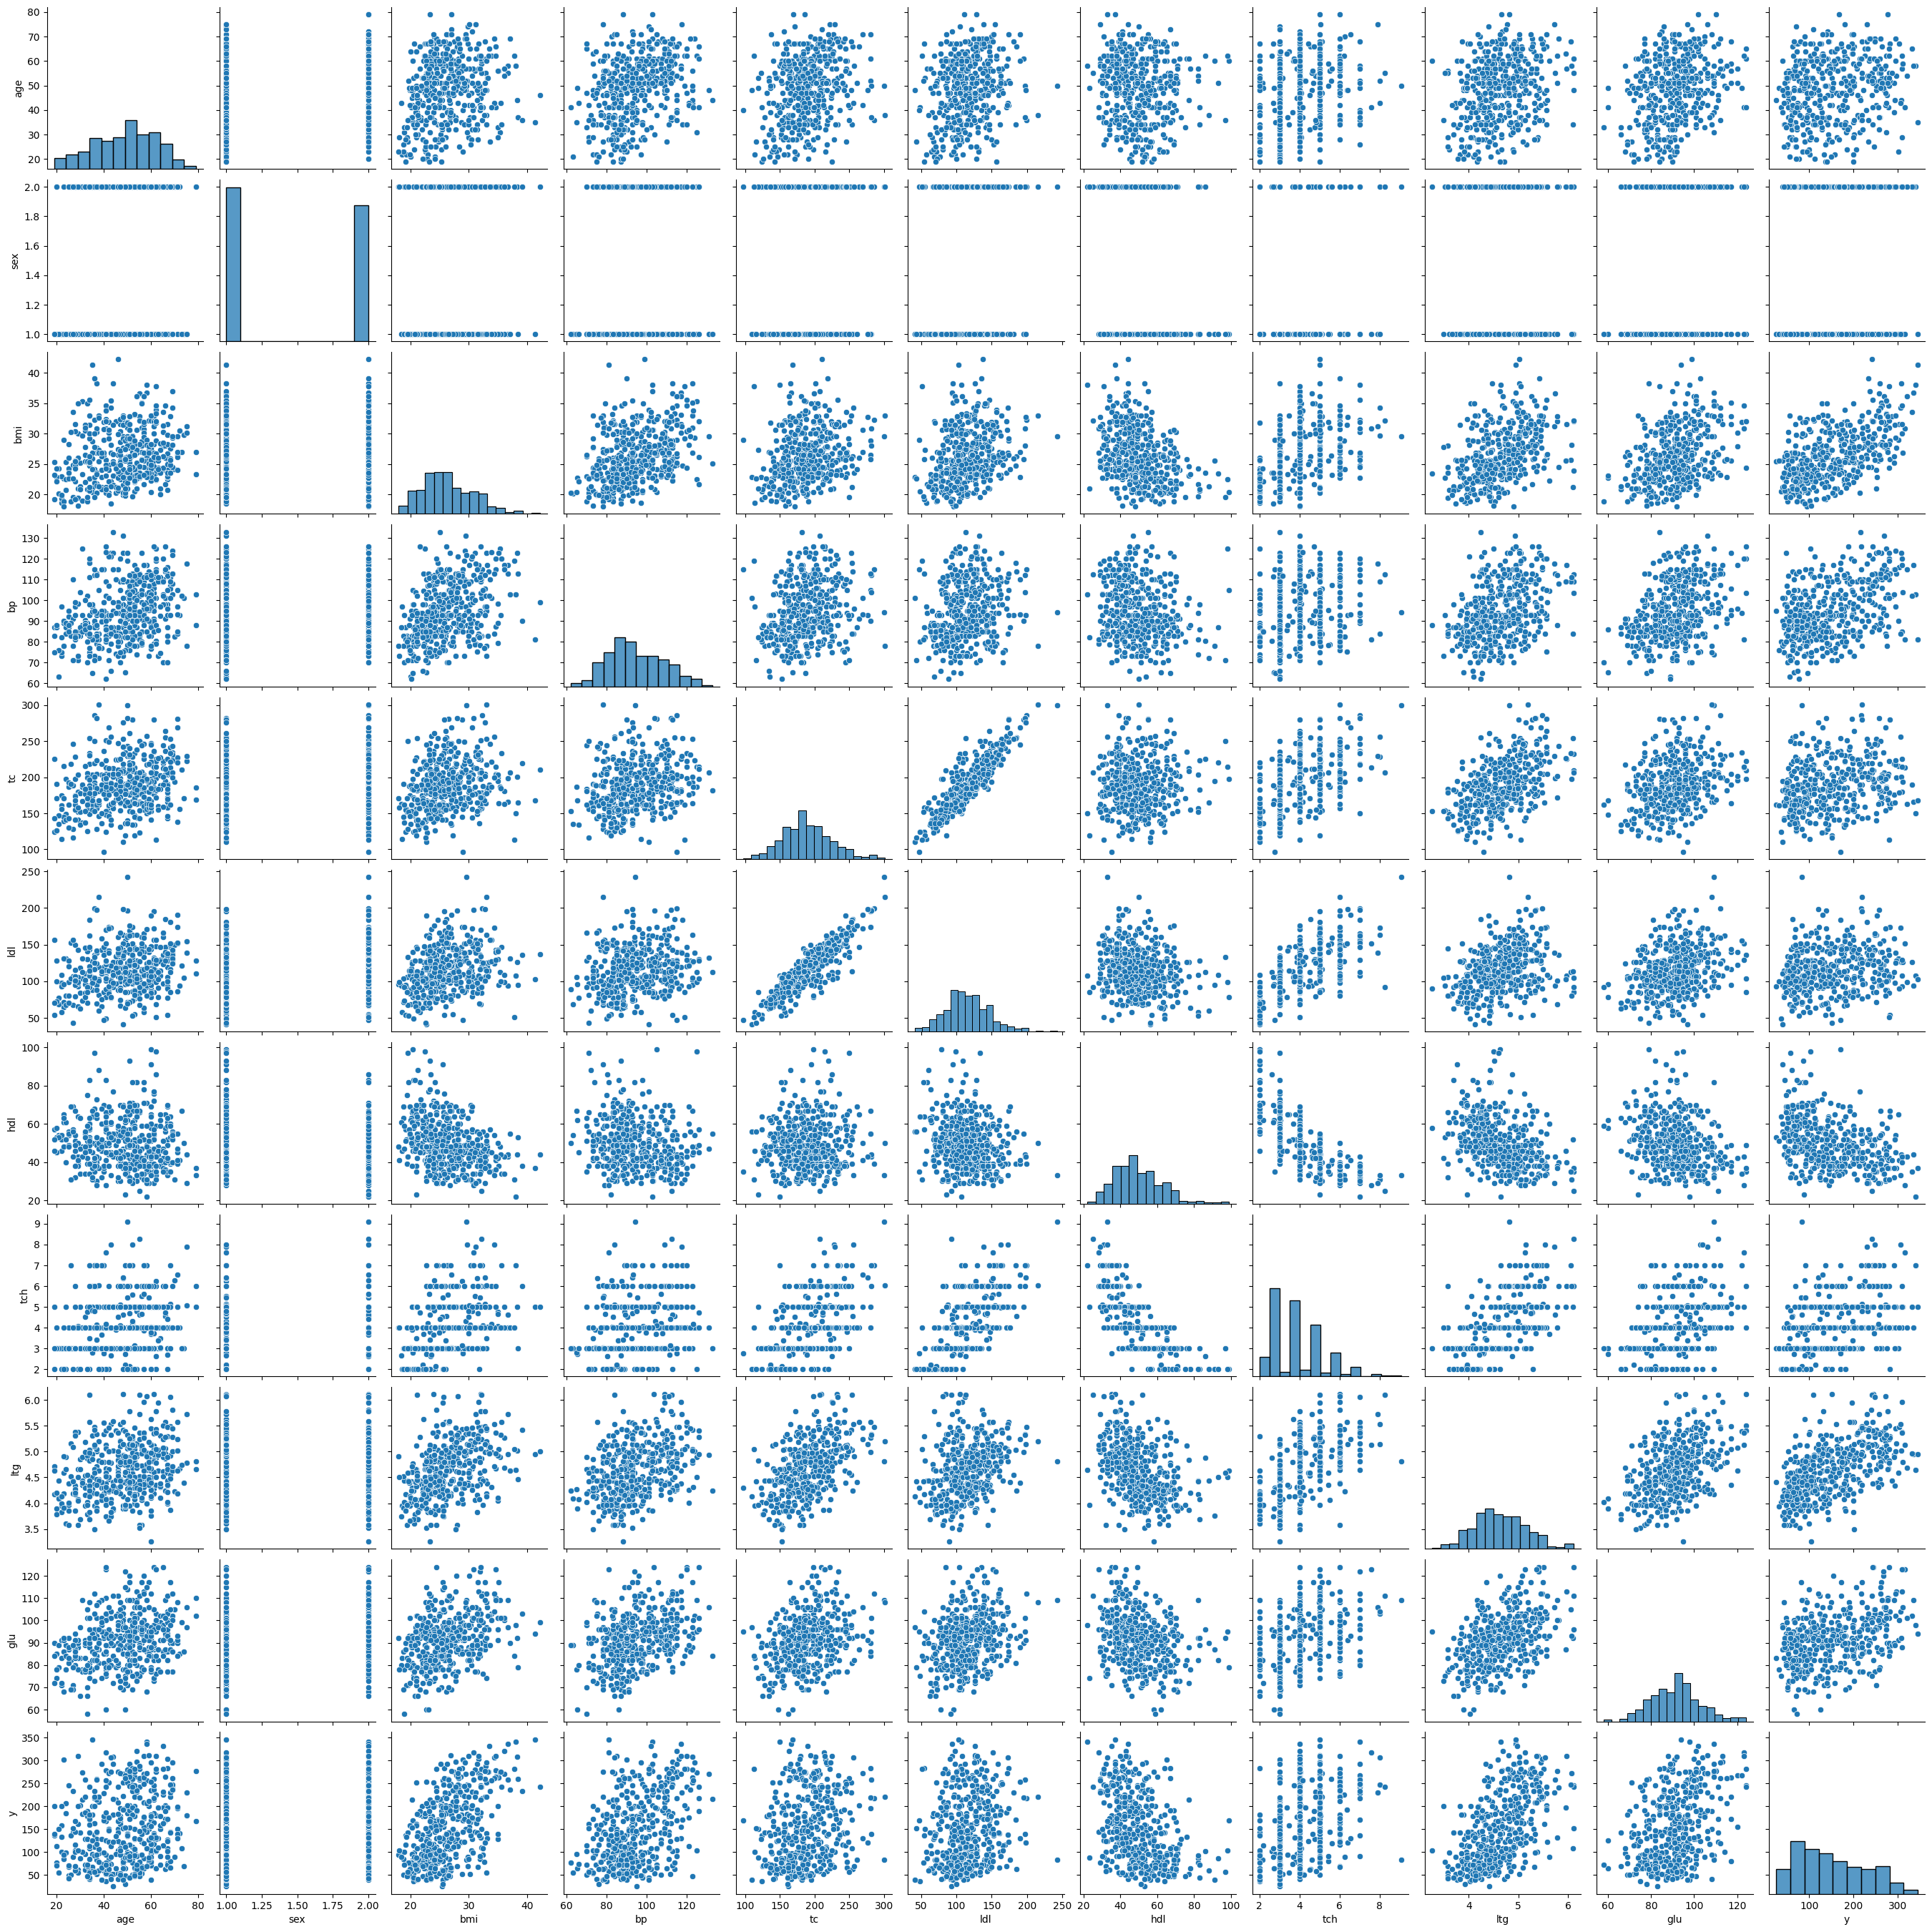

In [98]:
sns.pairplot(df)

Os subplots mostram o histograma de cada variável do nosso dataset.

Por exemplo, o segundo histograma contando a partir do topo se refere ao histograma da variável sexo, isso é perceptível porque nesse tipo de dado temos uma variável categórica e binária, ou seja as nossas observações podem assumir somente 2 tipos de dados.

Os gráficos de dispersão mostram as relações entre as variáveis, olhando para o gráfico de dispersão aos pares da quinta e sexta variáveis percebemos que existe uma correlação positiva entre elas. Ou seja, existe uma correlação positiva entre tc e ldl.

Também podemos verificar a correlação entre as variáveis. Da seguinte forma

In [99]:
df.corr()

age       sex       bmi        bp        tc       ldl       hdl  \
age  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
tc   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
ldl  0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
hdl -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
tch  0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
ltg  0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
glu  0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
y    0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

          tch       ltg       glu         y  
age  0.203841  0.270774  0.301731  0.187889  
sex  0.332115  0.149916  0.208133  0.043062  
bmi  0.413807  0.446157  0.388680  0.586450  
bp   0.257650  0.393480  0.390430  0.441482  
tc   0.542207  0.515503  0.325717  0.212022  
ldl  0.659817  0.318357  0.290600  0.174054  
hdl -0.738493 -0.398577 -0.273697 -0.394789  
tch  1.000000  0.617859  0.417212  0.430453  
ltg  0.617859  1.000000  0.464669  0.565883  
glu  0.417212  0.464669  1.000000  0.382483  
y    0.430453  0.565883  0.382483  1.000000

Perceba que a correlação entre tc e ldl é de $0,89663$ isso corrobora a ideia de que existe uma correlação forte entre essas duas variáveis.

Porém, nosso alvo é olhar a relação entre os nossos preditores é a nossa variável resposta $y$. É uma maneira muito grosseira de medir o poder preditivo de cada variável para $y$.

Perceba que sexo tem uma correalação baixa, dessa forma iremos utilizar todas as variáveis exceto a variável sexo nas nossas análises

# Exercício de Aplicação 1 - Examinando as variáveis tc,ldl e hdl
O conjunto de dados sobre diabetes, chamado de "df", será usado como exemplo do mundo real tanto neste capítulo quanto no próximo. A exploração adequada dos dados é a base para a realização de simulações de Monte Carlo eficazes, então você continuará explorando os dados nos exercícios!

Agora devemos analisar as variáveis tc,ldl e hdl dentro do dataframe

* Use a função pairplot() do seaborn para examinar visualmente a relação entre as colunas tc, ldl e hdl em df (especificadas nessa ordem).

* Utilize o método .corr() do pandas para calcular os coeficientes de correlação entre tc, ldl e hdl em df (especificados nessa ordem).


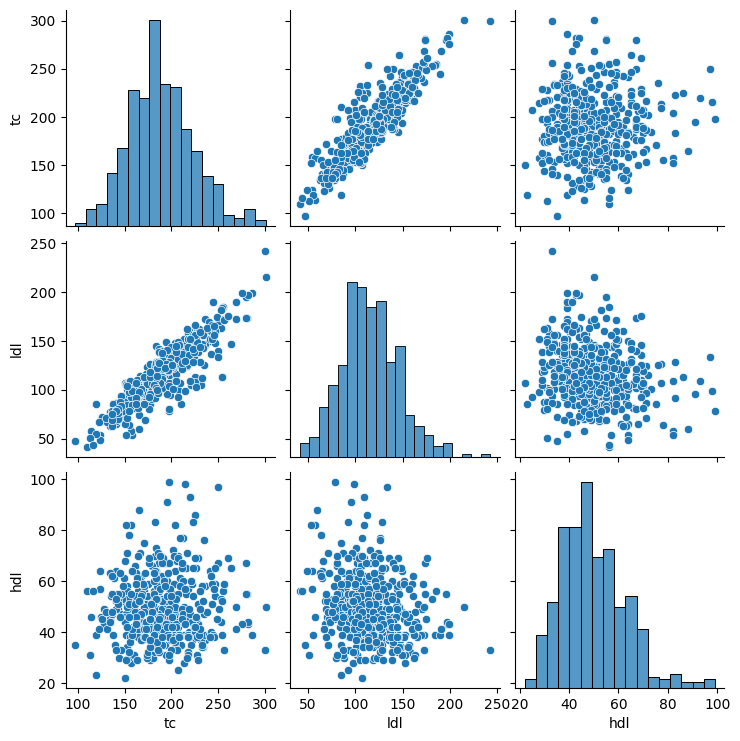

           tc       ldl       hdl
tc   1.000000  0.896663  0.051519
ldl  0.896663  1.000000 -0.196455
hdl  0.051519 -0.196455  1.000000


In [100]:
# Criando o pairplto
sns.pairplot(df[["tc", "ldl" ,"hdl"]])
plt.show()

# Calculando as correlações das variáveis específicas
print(df[["tc", "ldl", "hdl"]].corr())

## Exercício de Aplicação 2

* Use a função pairplot() do seaborn para examinar visualmente a relação entre as colunas tc, ldl e y em df (especificadas nessa ordem).

* Utilize o método .corr() do pandas para calcular os coeficientes de correlação entre tc, ldl e y em df (especificados nessa ordem).

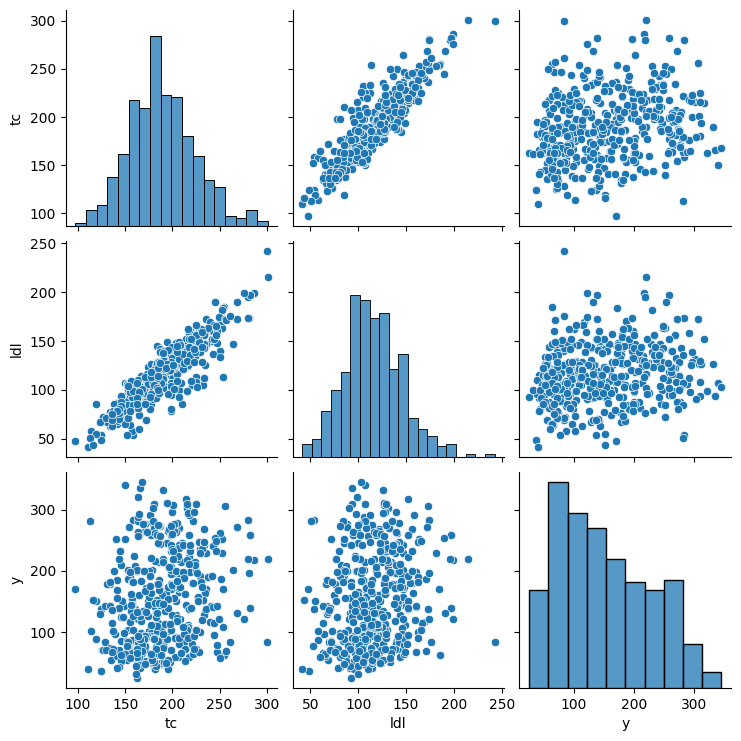

           tc       ldl         y
tc   1.000000  0.896663  0.212022
ldl  0.896663  1.000000  0.174054
y    0.212022  0.174054  1.000000


In [103]:
# Criando o pairplto
sns.pairplot(df[["tc", "ldl" ,"y"]])
plt.show()

# Calculando as correlações das variáveis específicas
print(df[["tc", "ldl", "y"]].corr())

## Escolhendo nossas distribuições de Probabilidade

Para fazer isso usamos o Estimador de Máxiam Verossimilhança (MLE). Este estimador mede o ajuste de uma distribuição de probabilidade dado os dados a serem analisados. Calculamso uma função de verossimilhança para diferentes parâmetros de distribuição de probabilidade dados os dados observados.

A distribuição que produz a maior probabilidade, dada os dados, é considerada ótima.

Usaremos o comando .nnlf() do scipy para calcular os referidos valores, porém esse comando retorna o valor da função de verossimilhança negativa, desta forma quando menor o valor do nnlf, melhor é o ajuste da distribuição.

O Estimador pode ser definido matematicamente como:
\begin{equation}
\hat{\theta}_{\text{MLE}} = \underset{\theta}{\mathrm{argmax}} \mathcal{L}(\theta ; \mathbf{x})
\end{equation}

Onde:

* $\hat{\theta}_{\text{MLE}}$ é o estimador de máxima verossimilhança.

* $\theta$ é o vetor de parâmetros da distribuição de probabilidade.

* $\mathcal{L}(\theta ; \mathbf{x})$ é a função de verossimilhança, que representa a probabilidade de observar os dados $\mathbf{x}$ dado os parâmetros $\theta$.


Para encontrar o estimador de máxima verossimilhança, maximizamos a função de verossimilhança em relação aos parâmetros da distribuição. Isso pode ser representado como:

\begin{equation}
\hat{\theta}_{\text{MLE}} = \underset{\theta}{\mathrm{argmax}} \prod_{i=1}^{n} f(x_i ; \theta)
\end{equation}

onde $f(x_i ; \theta)$ é a função de densidade de probabilidade da distribuição para a i-ésima observação, e $\prod_{i=1}^{n}$ é o símbolo de produto que indica a multiplicação de todas as probabilidades para todas as observações.

Tomando a variável age como exemplo, vamos fazer o seu histograma para verificar uma provável distribuição

<Axes: xlabel='age', ylabel='Count'>

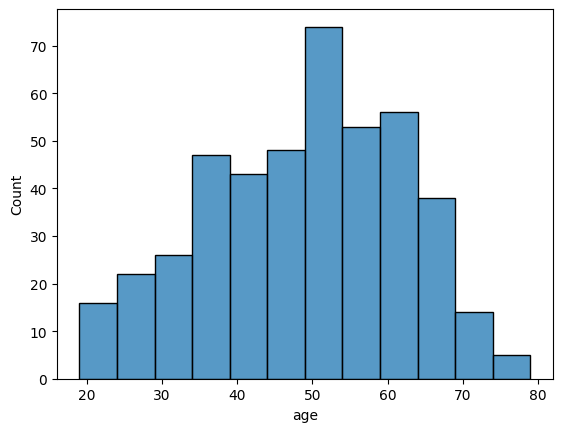

In [104]:
sns.histplot(df['age'])

Vemos que por ele, a distribuição normal pode ser uma boa candidata, porém isso se faz verdadeiro ?

Para definir qual é a melhor distribuição usaremos o seguinte método aplicado ao Estimador de Máxima Verossimilhança

In [105]:
#Definindo as prováveis distribuições em uma lista
dist = [st.laplace,st.norm,st.expon,st.uniform]
#Laplace, Normal, Exponencial e Uniforme
emvs = [] #lista para os valores das estimativas de cada distribuição
for distribuicao in dist:
  params = distribuicao.fit(df['age']) #calculo dos parametros
  emv = distribuicao.nnlf(params,df['age']) #Uso do estimador
  emvs.append(emv) #Armazenando os dados

melhor_fit = sorted(zip(dist,emvs),key = lambda d:d[1])[0]
print(f"O Melhor ajuste pesquisado usando {melhor_fit[0].name}, \
      Valor do Estimador {melhor_fit[1]} para a variável Age")
# Ordenando as estimativas do menor para o maior valor de nnlf
emvs_ordenados = sorted(zip(dist, emvs), key=lambda d: d[1])

# Imprimindo os valores ordenados e suas distribuições correspondentes
print("\nDistribuições ordenadas do menor para o maior valor de nnlf:")
for distribuicao, emv in emvs_ordenados:
    print(f"Distribuição: {distribuicao.name}, nnlf: {emv}")


O Melhor ajuste pesquisado usando norm,       Valor do Estimador 1764.0693689033028 para a variável Age

Distribuições ordenadas do menor para o maior valor de nnlf:
Distribuição: norm, nnlf: 1764.0693689033028
Distribuição: laplace, nnlf: 1797.8467779878652
Distribuição: uniform, nnlf: 1809.7002965021684
Distribuição: expon, nnlf: 1938.171599681118


In [106]:
# Agora iremos fazer para as outras variáveis
# Loop for
for variavel in ['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']:
    dist = [st.laplace, st.norm, st.expon, st.uniform]
    emvs = []
    # Loop para o ajuste
    for distribuicao in dist:
        params = distribuicao.fit(df[variavel])
        emv = distribuicao.nnlf(params, df[variavel])
        emvs.append(emv)
    # Encontrando o melhor ajuste
    melhor_fit = sorted(zip(dist, emvs), key=lambda d: d[1])[0]
    #A função lambda define a chave para a ordenação domo d[1]
    # a chave é o segundo item de cada tupla que é o EMV
    print(f"O melhor ajuste pesquisado usando {melhor_fit[0].name}, "
          f"Valor do Estimador {melhor_fit[1]} para a variável {variavel}")


O melhor ajuste pesquisado usando norm, Valor do Estimador 1764.0693689033028 para a variável age
O melhor ajuste pesquisado usando norm, Valor do Estimador 1283.356127017369 para a variável bmi
O melhor ajuste pesquisado usando norm, Valor do Estimador 1787.7746251622739 para a variável bp
O melhor ajuste pesquisado usando norm, Valor do Estimador 2193.1564373753627 para a variável tc
O melhor ajuste pesquisado usando norm, Valor do Estimador 2136.0440476305284 para a variável ldl
O melhor ajuste pesquisado usando norm, Valor do Estimador 1758.1350738323013 para a variável hdl
O melhor ajuste pesquisado usando norm, Valor do Estimador 739.3762494786798 para a variável tch
O melhor ajuste pesquisado usando norm, Valor do Estimador 339.6620870566908 para a variável ltg
O melhor ajuste pesquisado usando norm, Valor do Estimador 1706.0467588930867 para a variável glu


## Agora que escolhemos as distribuições de probabilidade adequadas para nossas variáveis de interesse, como podemos simular as correlações ?

Iremos utilizar agora, as variáveis aleatórias multivariadas para compreender este processo.

Com base nas estimativas feitas pelo Estimador de Máxima Verossimilhança, escolhemos a distribuição normal para várias de nossas variáveis. Como sabemos também que várias variáveis do nosso conjunto de dados são correlacionadas entre si, uma distribuição normal multivariada é adequada para a nossa simulação.

# Quais parâmetros vamos usar ?
Precisaremos dos seguintes parâmetros:
* Da média de cada variável
* Da matriz de covariância




In [107]:
#Calculando a média de cada variável
media_df = df[['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']].mean()
print(media_df)

age     48.518100
bmi     26.375792
bp      94.647014
tc     189.140271
ldl    115.439140
hdl     49.788462
tch      4.070249
ltg      4.641411
glu     91.260181
dtype: float64


In [108]:
#Calculando a covariancia
cov_df = df[['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']].cov()
cov_df

age        bmi          bp           tc         ldl         hdl  \
age  171.846610  10.719600   60.817945   117.983850   87.409154  -12.747296   
bmi   10.719600  19.519798   24.162884    38.191612   35.093059  -20.961368   
bp    60.817945  24.162884  191.304401   116.061168   78.051321  -31.979851   
tc   117.983850  38.191612  116.061168  1197.717241  943.771368   23.061486   
ldl   87.409154  35.093059   78.051321   943.771368  924.955494  -77.279343   
hdl  -12.747296 -20.961368  -31.979851    23.061486  -77.279343  167.293585   
tch    3.448283   2.359262    4.598687    24.214954   25.895541  -12.326138   
ltg    1.854271   1.029723    2.843024     9.319736    5.057894   -2.693069   
glu   45.472604  19.741914   62.081913   129.591539  101.605213  -40.697671   

           tch       ltg         glu  
age   3.448283  1.854271   45.472604  
bmi   2.359262  1.029723   19.741914  
bp    4.598687  2.843024   62.081913  
tc   24.214954  9.319736  129.591539  
ldl  25.895541  5.057894  101.605213  
hdl -12.326138 -2.693069  -40.697671  
tch   1.665261  0.416510    6.189527  
ltg   0.416510  0.272892    2.790604  
glu   6.189527  2.790604  132.165712

In [146]:
#Fazendo a simulação
sim_resultados = st.multivariate_normal.rvs(mean = media_df, size = 2000, cov = cov_df)

df_resultados_sim = pd.DataFrame(sim_resultados,columns = ['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'])


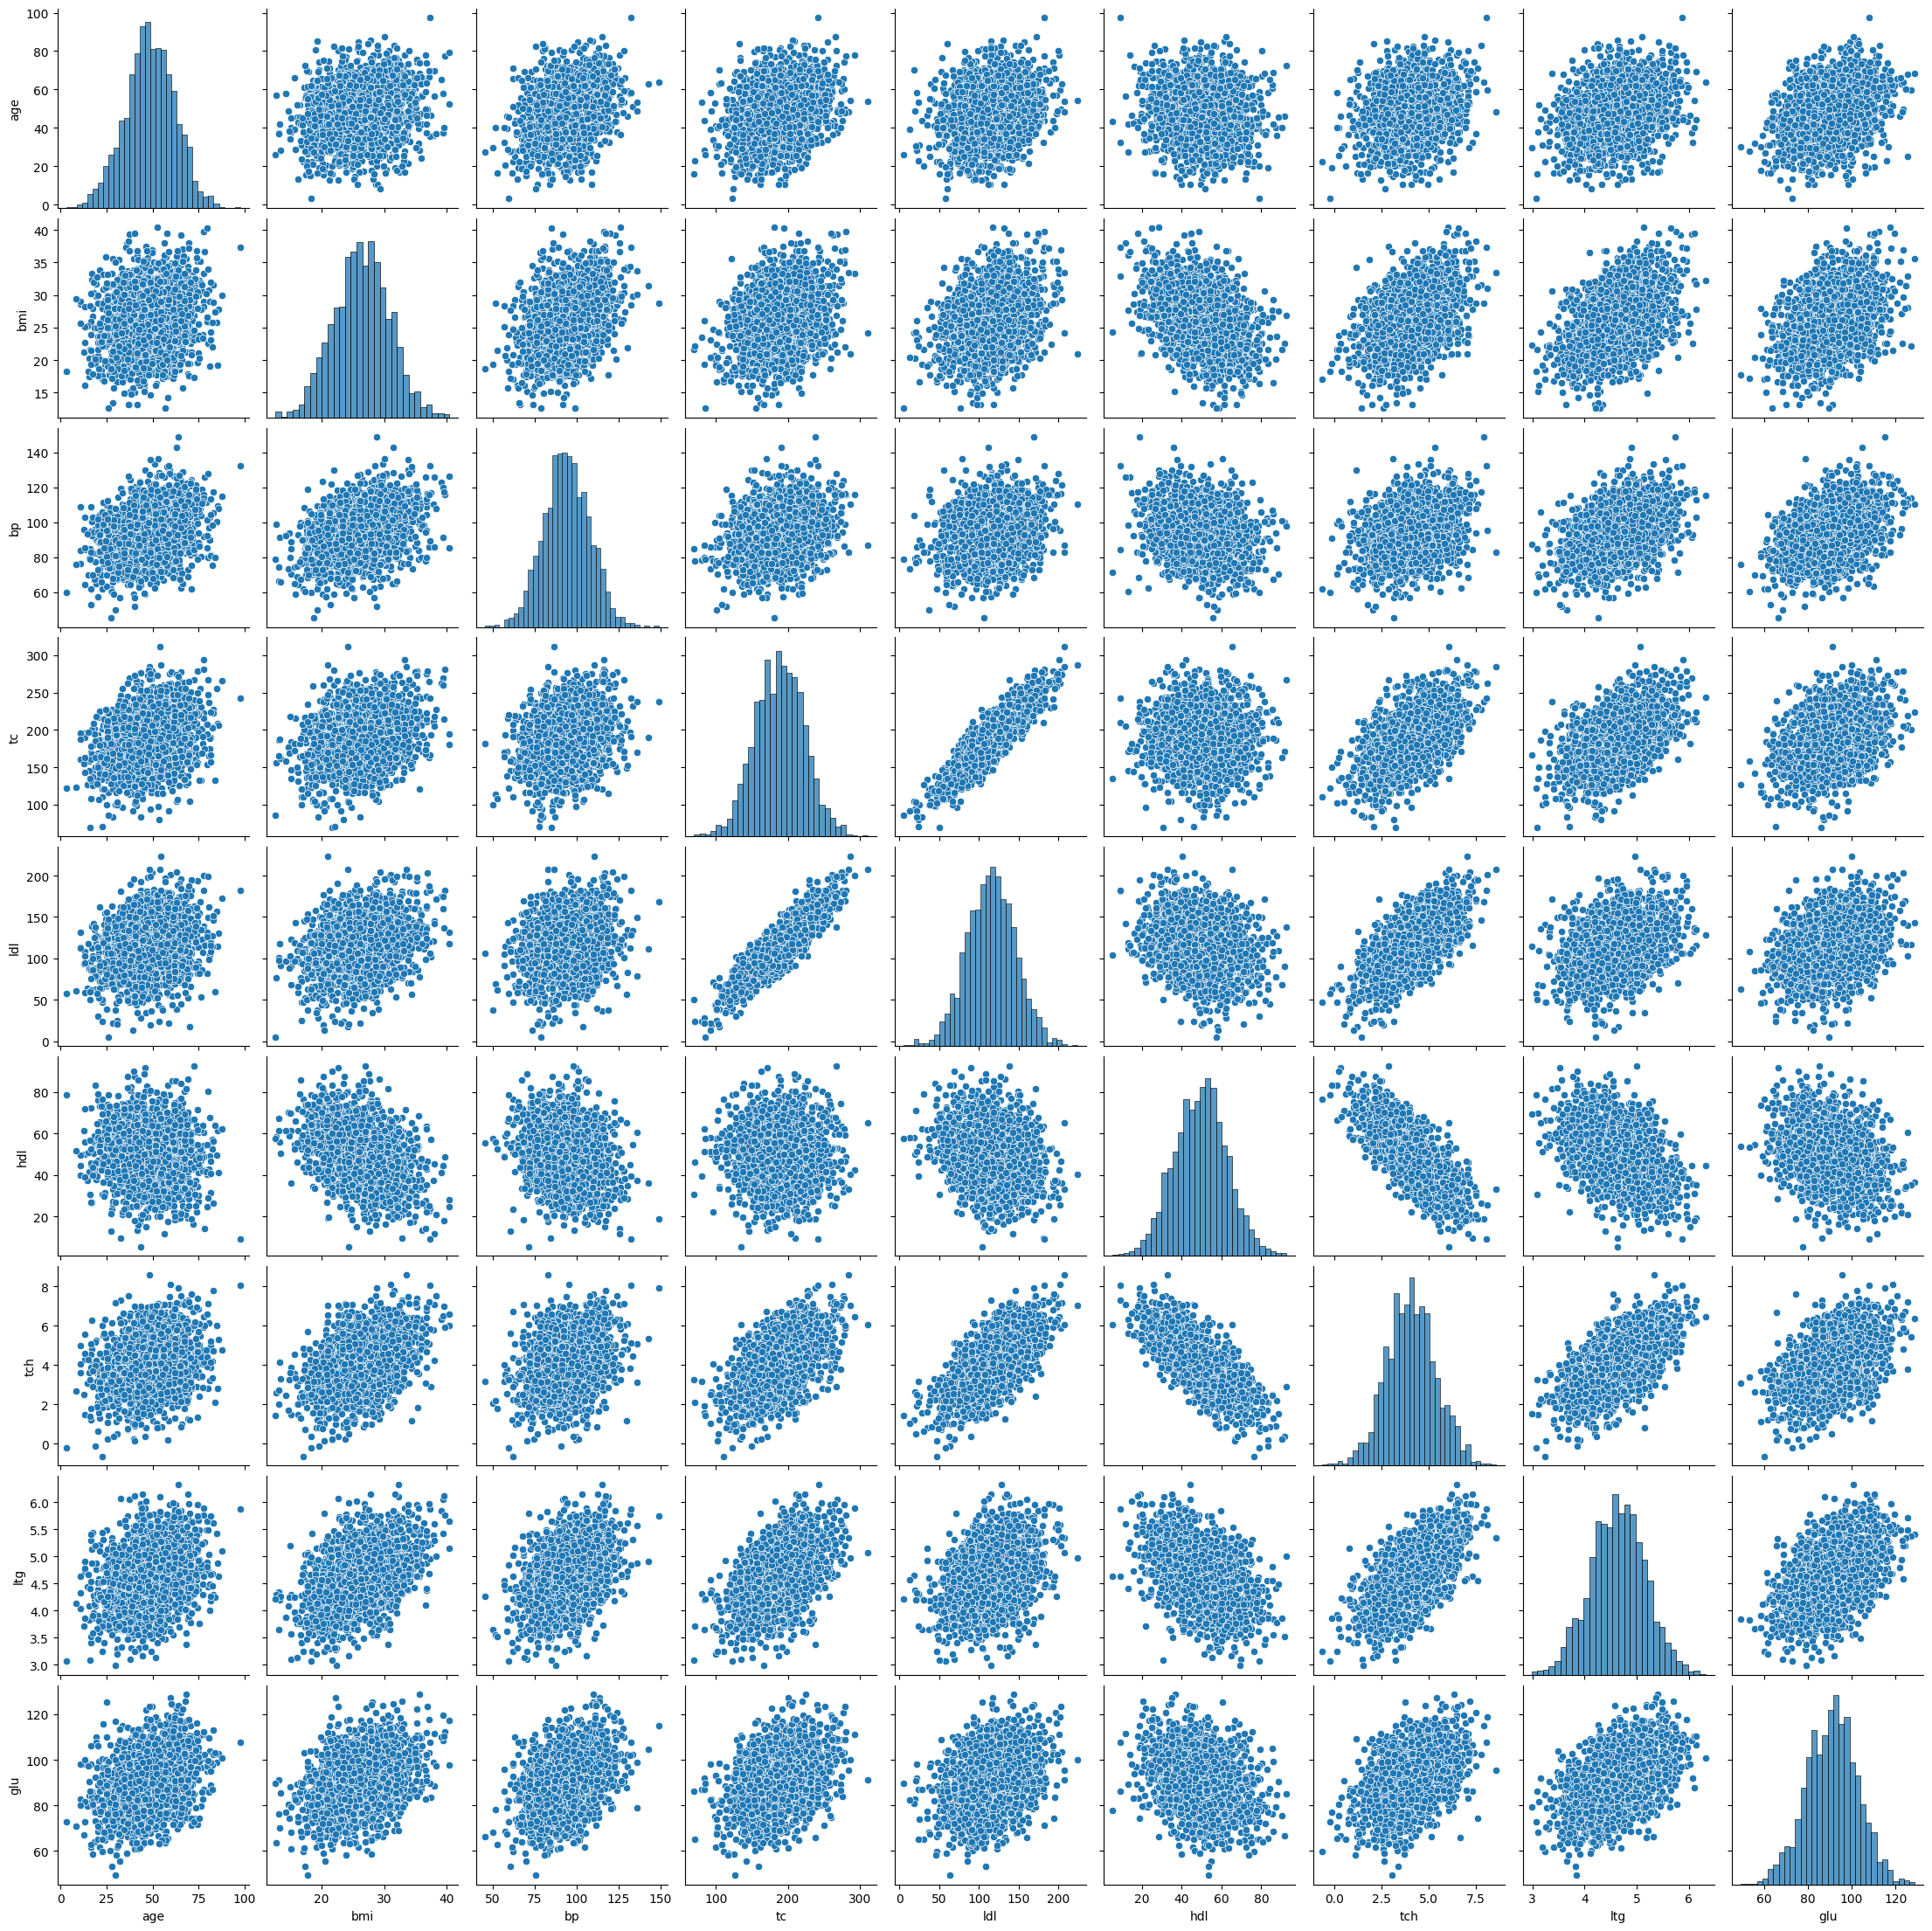

In [110]:
#Vendo os resultados
sns.pairplot(df_resultados_sim)

Perceba que na nossa simulação também obtemos que tc e ldl possuem uma correlação forte entre eles, preservaram a característica que encontramos nos dados históricos.

Os padrões fortes são preservados nos resultados da simulação, e temos mais pontos de dados nos resultados proque estamos simulando a partir de distribuições de probabilidade completas.
Em teoria, podemos gerar um número infinito de amostras, o que é muito útil.




# E o valor de $y$ ?
Certo, até agora simulamos apenas as variáveis preditoras, e a variável $y$ de resposta ?

Já temos um modelo de regressão preditiva, tal modelo fornece as previsões dadas as entradas.

É um modelo determinístico, o que significa que, dada a mesma entrada, sempre teremos a mesma previsão. Se uma mesma entrada for realizada $n$ vezes, receberemos $n$ vezes a mesma resposta a ela.

Este é um passo de cálculo determinístico regular, nem sempre precisaremos de um modelo de regressão ou qualquer modelo para cálculo determinístico.

Se tivessemos uma fórmula para o cálculo de $y$ poderiamos usa-la ao invés desse modelo.

O Modelo nesse caso usado se chama LARS, ele vem de *Least Angle Regression*

**Definição do Modelo:**

O modelo Least Angle Regression (LARS) é uma técnica de regressão linear utilizada para selecionar variáveis em um modelo de regressão quando há um grande número delas. O LARS é particularmente útil quando o número de preditores é maior que o número de observações, o que torna os métodos tradicionais de regressão problemáticos.

**Como ele funciona:**

* Começa com todos os coeficientes iguais a zero.
* A cada passo, identifica a variável mais correlacionada com o alvo.
* Move na direção dessa variável, aumentando o coeficiente de forma proporcional à correlação.
* Continua adicionando variáveis uma por uma, ajustando os coeficientes de acordo com a correlação e a direção em que maximizam a semelhança com o alvo.
* O processo é iterativo e termina quando um critério de parada é alcançado.

**Parâmetros:**
* Critério de parada: pode ser definido pelo número máximo de iterações ou pela precisão desejada.
* Regularização: o LARS pode ser usado com regularização L1 (Lasso) ou L2 (Ridge) para evitar overfitting e lidar com multicolinearidade.

**Como ele pode ser usado:**
* Seleção de características: o LARS é útil para identificar as variáveis mais importantes em um conjunto de dados.
* Previsão: uma vez que as variáveis relevantes são selecionadas, o modelo pode ser usado para fazer previsões.
* Análise de sensibilidade: o LARS permite entender como diferentes variáveis afetam o resultado final, ajudando na interpretação dos dados.

Esse modelo é dado por:

\begin{equation*}
\hat{\beta}^{LARS} = \arg \min_{\beta} \left\{ \frac{1}{2n} \lVert y - X\beta \rVert_2^2 \right\} \text{ subject to } \lVert \beta \rVert_1 \leq t
\end{equation*}

Onde:
* $y$ é o vetor de resposta.
* $X$ é a matriz de preditores.
* $\beta$ são os coeficientes a serem estimados.
* $t$ é um parâmetro de regularização.


In [143]:
#Gerando o modelo a partir do artigo
from sklearn.linear_model import Lars
from sklearn.model_selection import train_test_split #Treino do Modelo
from sklearn.preprocessing import StandardScaler
# Selecionar apenas as colunas de entrada ['AGE', 'BMI', 'BP', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']
X_pred = df_resultados_sim[['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']]
# Selecionar colunas de entrada e saída para teste e treinamento a partir do conjunto original
X = df[['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']]
y = df['y']
# Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Criar e treinar o modelo
model = Lars()
model.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
predictions = model.predict(X_pred)
df_resultados_sim['y_previsto'] = predictions # adicionando ao df

# Exibir as previsões para os primeiros 5 valores
print(predictions[0:5])


[180.76052334 168.9547866  200.69504706 161.79514654 120.42623243]


In [147]:
def reg_model(input_df):
  from sklearn.linear_model import Lars
  from sklearn.model_selection import train_test_split
  ###################################################################################################
  #Função para realizar modelagem de regressão linear e adicionar previsões ao DataFrame de entrada.#
  #                                                                                                 #
  #Argumentos:                                                                                      #
  #  input_df (DataFrame): O DataFrame de entrada contendo os dados a serem modelados.              #
  #                                                                                                 #
  #Retorna:                                                                                         #
  #  DataFrame: O DataFrame de entrada modificado com a coluna `'y_previsto'` contendo as previsões.#
  ###################################################################################################

  # Selecionar apenas as colunas de entrada ['AGE', 'BMI', 'BP', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']
  X_pred = input_df[['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']]

  # Selecionar colunas de entrada e saída para treinamento a partir do conjunto original
  X = df[['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']]
  y = df['y']

  # Dividir em conjuntos de treinamento e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # Criar e treinar o modelo
  model = Lars()
  model.fit(X_train, y_train)

  # Fazer previsões usando o modelo treinado
  predictions = model.predict(X_pred)

  # Adicionando previsões ao df
  input_df['y_previsto'] = predictions

  # Retornar o DataFrame modificado
  return input_df

In [148]:
#Testando a função
reg_model(df_resultados_sim)

age        bmi          bp          tc         ldl        hdl  \
0     34.426786  23.505616   87.065934  150.120028  101.759683  34.277130   
1     54.744305  20.703402   99.766954  159.980583   86.070161  52.049110   
2     61.619149  29.425720   95.656337  178.899340   92.365756  61.968800   
3     63.959549  22.012881   80.854297  211.413854  110.089496  77.142173   
4     44.378742  29.871760   90.572527  230.898987  156.928490  54.113660   
...         ...        ...         ...         ...         ...        ...   
1995  26.647691  19.429511   70.593325  126.731229   70.956908  49.503781   
1996  58.079855  28.792684  111.301084  208.870742  145.946012  22.907511   
1997  65.183280  33.828834  121.477984  211.665388  137.133384  26.687523   
1998  42.813228  26.579589  104.117410  244.678102  141.497288  50.057684   
1999  45.596967  27.538017  112.604766  192.952195  108.166619  55.240371   

           tch       ltg         glu  y_previsto  
0     4.318422  4.258417   74.829912  119.992222  
1     2.675186  4.368292   91.219012  104.009062  
2     2.867182  4.588352   89.468104  168.438916  
3     2.005593  4.383903   96.040337   74.783221  
4     4.185726  4.633089   91.593612  162.734569  
...        ...       ...         ...         ...  
1995  3.025666  3.891772   77.746082   61.542817  
1996  6.375873  5.235424   94.828615  216.224861  
1997  5.716156  5.871046  102.509575  308.788829  
1998  5.267820  5.794243   96.806028  223.987009  
1999  4.352217  4.736449   90.261472  178.366714  

[2000 rows x 10 columns]

<Axes: ylabel='Count'>

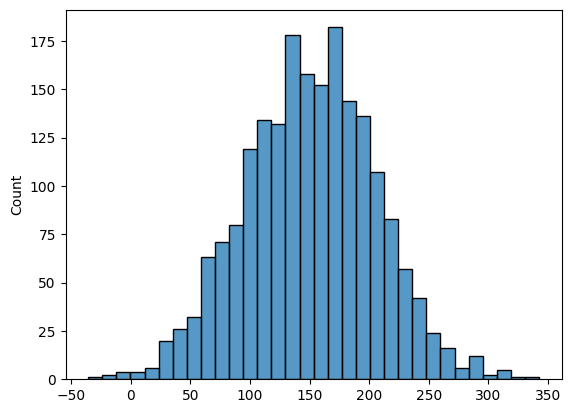

In [114]:
#Fazendo o histograma
sns.histplot(predictions)

Perceba que quanto maior o valor de $y$, maior é a progressão da doença, se tornando assim mais grave para o paciente

## Exercício de Aplicação 1 - Simulando os dados para Diabetes usando Monte Carlo

Uma boa simulação deve ter resultados semelhantes aos dados históricos. Isso foi verdadeiro para a simulação no vídeo? Neste exercício, você explorará uma maneira de examinar os resultados da simulação e descobrirá!

Primeiro, você realizará uma simulação usando a distribuição normal multivariada e a média e a matriz de covariância de dia. Em seguida, você verificará as médias dos dados históricos e simulados. Elas são semelhantes?

* Realize a simulação 10.000 vezes usando a distribuição normal multivariada e a média e a matriz de covariância do seu conjunto de dados

* Use a função .mean() do pandas para calcular os valores médios das colunas bmi e tc do conjunto de dados históricos df e os resultados simulados de bmi e tc do df_results para avaliar se eles são semelhantes.

* Da mesma forma, use .cov() do pandas para calcular a matriz de covariância das colunas bmi e tc do df e os resultados simulados de bmi e tc do df_results para avaliar se eles são semelhantes.


In [149]:
# Calculando a matriz de covariância e a média para os dados históricos
cov_df = df[['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']].cov()
mean_df = df[['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']].mean()

# Simulação usando a distribuição normal multivariada com base nos dados históricos
resultados_simulacao = st.multivariate_normal.rvs(mean=mean_df, size=10000, cov=cov_df)

# Criando um DataFrame com os resultados simulados
df_resultados = pd.DataFrame(resultados_simulacao, columns=['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'])

# Calculando as médias de bmi e tc para os dados históricos e os resultados simulados
print("Médias de BMI e TC para os dados históricos:")
print(df[["bmi","tc"]].mean())
print("\nMédias de BMI e TC para os resultados simulados:")
print(df_resultados[['bmi','tc']].mean())

# Calculando as covariâncias de bmi e tc para os dados históricos e os resultados simulados
print("\nCovariâncias de BMI e TC para os dados históricos:")
print(df[["bmi","tc"]].cov())
print("\nCovariâncias de BMI e TC para os resultados simulados:")
print(df_resultados[['bmi','tc']].cov())

Médias de BMI e TC para os dados históricos:
bmi     26.375792
tc     189.140271
dtype: float64

Médias de BMI e TC para os resultados simulados:
bmi     26.307203
tc     189.305294
dtype: float64

Covariâncias de BMI e TC para os dados históricos:
           bmi           tc
bmi  19.519798    38.191612
tc   38.191612  1197.717241

Covariâncias de BMI e TC para os resultados simulados:
           bmi           tc
bmi  19.293296    37.202648
tc   37.202648  1207.576064



Anteriormente usamos .cov() para obter a matriz de covariância e .corr() para obter a matriz de correlação. É fácil confundir os dois entre si e usá-los incorretamente em simulações. Vamos esclarecer isso!

Uma matriz de correlação é uma matriz de covariância padronizada, onde os coeficientes de correlação na matriz de correlação contêm valores de 0 a 1. Sendo definida pela seguinte equação
\begin{equation}
cov(x,y) = \rho(x,y)\cdot \sigma(x) \cdot \sigma(y)
\end{equation}

A equação acima nos diz que a covariância, o valor de $cov(x,y)$ , pode ser calculada multiplicando o coeficiente de correlação $\rho(x,y)$ com o desvio padrão de $x$,$\sigma(x)$ , , e o desvio padrão de $y$,$\sigma(y)$.

Verificaremos isso nesse exercício

In [150]:
# Calcular a matriz de covariância de bmi e tc
cov_df2 = df[['bmi','tc']].cov()

# Calcular a matriz de correlação de bmi e tc
corr_df2 = df[['bmi','tc']].corr()
std_df2 = df[["bmi","tc"]].std()

print(f'Covariância de bmi e tc a partir da matriz de covariância :{cov_df2.iloc[0,1]}')
print(f'Covariância de bmi e tc a partir da matriz de correlação :{corr_df2.iloc[0,1] * std_df2[0] * std_df2[1]}')

Covariância de bmi e tc a partir da matriz de covariância :38.191612029427134
Covariância de bmi e tc a partir da matriz de correlação :38.191612029427176


## Gerando Estatísticas Resumidas

Estamos interessados agora na diferença de resultados para diabetes, o $y$ previsto, para pessoas no primeiro e quarto quartis de idade.

O que são os quartis ?
Os quartis são medidas estatísticas que dividem um conjunto de dados em quatro partes iguais. O primeiro quartil (25%) representa o valor abaixo do qual 25% dos dados estão localizados, enquanto o terceiro quartil (75%) representa o valor abaixo do qual 75% dos dados estão localizados.

In [151]:
#Gerando os quantis
print(np.quantile(df_resultados_sim['age'],0.25))
print(np.quantile(df_resultados_sim['age'],0.75))

38.61863217726682
57.45663738228851


Certo, com os quartis calculados podemos aderir eles a variáveis e entender como que a doença avança para pessoas dentro desses intervalos de idade.

In [152]:
#Aderindo os cálculos á variáveis
idade_q25 = np.quantile(df_resultados_sim['age'],0.25)
idade_q75 = np.quantile(df_resultados_sim['age'],0.75)
#Filtrando os resultados
#para mostar os pacientes que estão no quarto ou no primeiro quartil da distribuição
media_idade_q75_previsto = np.mean(df_resultados_sim[df_resultados_sim['age'] > idade_q75]['y_previsto'])
media_idade_q25_previsto = np.mean(df_resultados_sim[df_resultados_sim['age'] < idade_q25]['y_previsto'])
#Calculando a diferença
diff = media_idade_q75_previsto - media_idade_q25_previsto
#Imprimindo resultado
print(diff)


39.63190675412591


Lembrando que esta é uma medida da progressão da doença, com valores maiores significando que a progressão da doença é mais grave em pacientes mais velhos

Nossa segunda questão é um pouco mais complexa, pois envolve a diferença nos resultados para pessoas no primeiro e no quarto quartis de idade e de BMI (IMC)

E qual é o intervalo de confiança de 85% e o desvio padrão para essa diferença.

Nesse caso, não estamos interessados apenas em uma estimativa pontual baseada em um resultado da simulação, mas sim devemos encontrar a distribuição e sua incerteza atrelada a ela

In [153]:
#Usaremos um loop for para simular
y_dif = [] #Lista para a diferença de resultados y
for i in range(1000):
  #Aqui iremos fazer uma nova simulação com um novo tamanho de amostra
  resultados_simulacao = st.multivariate_normal.rvs(mean=media_df,size = 1000,cov = cov_df)
  df_resultados_simulacao_2 = pd.DataFrame(resultados_simulacao, columns = ['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'])
  #Agora iremos rodar o mesmo modelo preditivo que fizemos antes
  reg_model(df_resultados_simulacao_2)
  #Agora definimos os quantis para IMC e idade
  idade_q25 = np.quantile(df_resultados_simulacao_2['age'],0.25)
  idade_q75 = np.quantile(df_resultados_simulacao_2['age'],0.75)
  bmi_q25 = np.quantile(df_resultados_simulacao_2['bmi'],0.25)
  bmi_q75 = np.quantile(df_resultados_simulacao_2['bmi'],0.25)
  #Agora iremos filtrar e calcular o resultado médio
  resultado_q75 = np.mean(df_resultados_simulacao_2[(df_resultados_simulacao_2['bmi'] > bmi_q75) & (df_resultados_simulacao_2['age'] > idade_q75)]['y_previsto'])
  resultado_q25 = np.mean(df_resultados_simulacao_2[(df_resultados_simulacao_2['bmi'] < bmi_q25) & (df_resultados_simulacao_2['age'] < idade_q25)]['y_previsto'])
  dif_y = resultado_q75 - resultado_q25
  y_dif.append(dif_y)


Agora iremos resumir nossos resultados

In [154]:
#Média
media_y_dif = np.mean(y_dif)
print(f"A Média dos Resultados da Simulação para y_previsto é{media_y_dif}.")
#Intervalo de Confiança a 95%
ic_inferior = np.quantile(y_dif,0.025)
ic_superior = np.quantile(y_dif,0.975)
print(f'O intervalo de confiança à 95% para a variável y_previsto simulada é {ic_inferior} como limite inferior e {ic_superior} como limite superior')
#Desvio Padrão
desv_pad = np.std(y_dif)
print(f"O Desvio Padrão para a variável y_previsto simulada é {desv_pad}.")


A Média dos Resultados da Simulação para y_previsto é99.17673603334924.
O intervalo de confiança à 95% para a variável y_previsto simulada é 85.16702769337175 como limite inferior e 112.43184557348228 como limite superior
O Desvio Padrão para a variável y_previsto simulada é 6.703365991762557.


<Axes: ylabel='Count'>

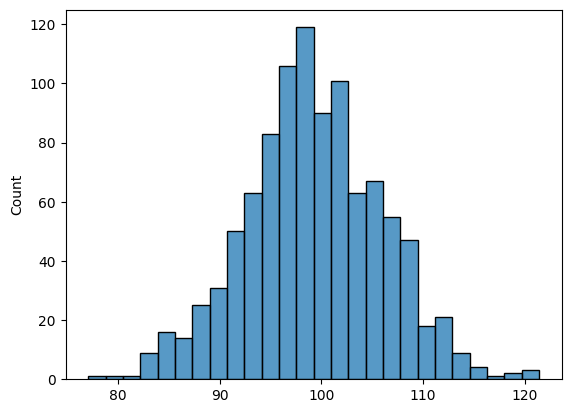

In [155]:
#Fazendo o histograma
sns.histplot(y_dif)

Nossos resultados sugerem que a diferença na progressão da doença entre pacientes mais velhos com maior IMC e pacientes mais novos com menor IMC é ainda maior que a diferença entre pacientes mais velhos e pacientes mais jovens

**Pelos nossos estudos, sabemos que tanto IMC quanto Idade estão positivamente associados à progressão da diabetes, então esse resultado faz sentido**

## Avaliando nossas escolhas para as Distribuições usadas

Quando fizemos a simulação realizamos uma compreensão intuitiva dos dados e das distribuições disponíveis, muitas vezes com o apoio de vizualizações exploratórias

Usamos o Estimador de Máxima Verossimilhança para diferentes distribuições e a partir de seu resultado escolhemos a melhor

Agora iremos avaliar com mais profundidade a qualidade do ajuste das distribuições candidatas em relação aos nossos dados, Usando o teste de Kolmogorov-Smirnov, muitas vezes abreviado como ks-test, é a forma mais adequada de se fazer isso.

O Teste quantifica a distância entre a distribuição empírica dos dados e  distribuição teórica de probabilidade candidata

Tal teste é dado por

\begin{equation}
D = \sup_{x} |F_n(x) - F(x)|
\end{equation}

O teste de Kolmogorov-Smirnov é um teste estatístico não paramétrico usado para determinar se duas amostras independentes foram tiradas de populações com distribuições de probabilidade iguais ou se uma amostra foi tirada de uma população com uma distribuição de probabilidade específica.

A estatística de teste $D$ é calculada como a maior discrepância entre as funções de distribuição acumulada empíricas das duas amostras ou entre a função de distribuição acumulada empírica de uma amostra e uma distribuição de referência teórica.

O teste é amplamente utilizado em uma variedade de aplicações, incluindo comparação de distribuições de probabilidade, detecção de desvios em dados experimentais e validação de modelos estatísticos.Ele é particularmente útil quando os dados não podem ser assumidos como normalmente distribuídos ou quando o tamanho da amostra é pequeno.

No scipy para executarmos esse teste usamos o comando
```
scipy.stats.kstest()
```


## Qual é a diferença entre o Estimador de Máxima Verossimilhança e o Teste de Kolmogorov-Smirnov ?

Calcular o EMV e executar os testes ks têm propósitos semelhantes, mas ligeiramente diferentes.

O EMV produz o melhor candidato entre um conjunto de distribuições candidatas, enquanto os testes ks fornecem informações sobre se uma determinada distribuição de probabilidade se ajusta bem aos dados


In [156]:
# Tomando a variável Idade como exemplo
resultados = [] #lista de resultados
distribuicoes = ['laplace','norm','expon']
for i in distribuicoes:
  dist_prob = getattr(st,i) # Encontrar módulo correspondente a distribuição no Scipy
  params = dist_prob.fit(df["age"]) #Ajuste dos dados
  resultados = st.kstest(df["age"],i,args = params)
  #Existem 3 argumentos para o teste: os dados, o nome da distribuição e os parametros ajustados
  print(resultados)

KstestResult(statistic=0.09511179937112832, pvalue=0.0006239579389182981, statistic_location=42, statistic_sign=1)
KstestResult(statistic=0.0615913626181368, pvalue=0.06703225234359811, statistic_location=51, statistic_sign=-1)
KstestResult(statistic=0.2536037941921312, pvalue=1.5202547969084796e-25, statistic_location=34, statistic_sign=-1)


Repare que os testes vem acompanhados do p-valor acompanhada da estatística do teste. Vamos debater melhor essas variáveis

* **A Estatística do Teste**:
  Mede a distância entre a distribuição dos nossos dados e a distribuição téorica candidata
* **P-Valor**:
  Já o p-valor indica a probabilidade de que os dados sejam gerados a partir da distribuição candidata, um p-valor de corte de 0,05 é frequentemente usado para fazer a determinação.

Examinando nossos resultados, vemos que para a distribuição de Laplace e a Exponencial, os p-valores são bem pequenos, indicando que é altamente improvável que os dados de idade no nosso conjunto sejam gerados por essas distribuições.

Já para a normal,o p-valor é $0.0670322$ indicando que não podemos descartar a possibilidade de que os dados da nossa variável escolhida sejam gerados a partir de uma distribuição normal

## Explorando nossos resultados com Vizualizações

Recordando o valor y_previsto no nosso conjunto de dados representa a progressão prevista para o Diabetes.

Talvez estejamos interessados em olhar as diferenças nos valores de y previstos para pessoas que estão no quartil superior de cada preditor em comparação com o primeiro quartil

In [157]:
#Criando um dicionário para percorrer cada variável preditora da nossa simulação
#Após isso esse loop irá obter o 25°e o 75° quantis de cada uma

dic_dif = {} #dicionário vazio para armazenar os dados
#Loop for para varredura
for variavel in ['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']:
  variavel_q25 = np.quantile(df_resultados_sim[variavel],0.25)
  variavel_q75 = np.quantile(df_resultados_sim[variavel],0.75)
  #Calculando a diferença média
  q75_y_previsto = np.mean(df_resultados_sim[(df_resultados_sim[variavel] > variavel_q75)]['y_previsto'])
  q25_y_previsto = np.mean(df_resultados_sim[(df_resultados_sim[variavel] < variavel_q25)]['y_previsto'])
  y_diferenca = q75_y_previsto - q25_y_previsto
  dic_dif[variavel] = [y_diferenca] #armazenar resultados
  #Convertendo para um dataframe
df_diferenca = pd.DataFrame.from_dict(dic_dif)
df_diferenca.head()

age         bmi         bp         tc        ldl        hdl  \
0  39.631907  121.569561  89.349841  43.756122  29.942561 -75.412705   

         tch         ltg        glu  
0  80.516099  120.197451  77.689609

Os resultados para pacientes no quartil superior do IMC(BMI) são muito piores do que aqueles no quartil inferior. Enquanto aqueles no quartil superior dos valores de HDL têm melhores resultados

## Realizando a Simulação por 1000 vezes

In [161]:
# Lista para armazenar os resultados de cada simulação
df_simulacoes_somadas = []
n = 1000 #numero de simulacoes
# Loop de simulação
for i in range(n):
    # Gerar dados de simulação multivariados com scipy
    mean = media_df
    cov = cov_df
    resultados_simulacao = st.multivariate_normal.rvs(mean=mean, cov=cov, size=1000)
    df_simulacao_temp = pd.DataFrame(resultados_simulacao, columns=['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'])
    # Aplicando o modelo
    reg_model(df_simulacao_temp)
    # Armazenar o dataframe da simulação atual na lista
    df_simulacoes_somadas.append(df_simulacao_temp)
# Concatenar DataFrames de cada simulação
df_resultados_sim = pd.concat(df_simulacoes_somadas, ignore_index=True)

# Cálculo das diferenças médias
dic_dif = {}
for variavel in ['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']:
    diferenca_por_simulacao = []
    for i in range(n):
        variavel_q25 = np.quantile(df_simulacoes_somadas[i][variavel], 0.25)
        variavel_q75 = np.quantile(df_simulacoes_somadas[i][variavel], 0.75)
        q75_filtro = df_simulacoes_somadas[i][variavel] > variavel_q75
        q25_filtro = df_simulacoes_somadas[i][variavel] < variavel_q25
        y_diferenca = np.mean(df_simulacoes_somadas[i][q75_filtro]['y_previsto']) - np.mean(df_simulacoes_somadas[i][q25_filtro]['y_previsto'])
        diferenca_por_simulacao.append(y_diferenca)
    dic_dif[variavel] = diferenca_por_simulacao

# Exibir o dataframe final com as diferenças médias
df_diferenca = pd.DataFrame.from_dict(dic_dif)
df_diferenca.head()

age         bmi         bp         tc        ldl        hdl  \
0  46.925509  116.494123  90.238447  44.982419  34.733330 -73.695208   
1  32.734315  112.903057  88.676690  38.878892  26.498456 -73.752765   
2  48.071480  113.291584  93.282019  42.634660  39.575278 -80.882553   
3  33.792622  117.601874  88.054532  37.990424  30.486241 -69.915483   
4  31.449416  113.747270  83.715506  48.748478  40.921612 -84.088127   

         tch         ltg        glu  
0  84.332570  116.569581  78.362969  
1  89.082069  110.869354  81.590330  
2  87.002656  107.336190  71.392611  
3  72.632637  108.352960  77.415912  
4  86.516257  107.192423  71.995397

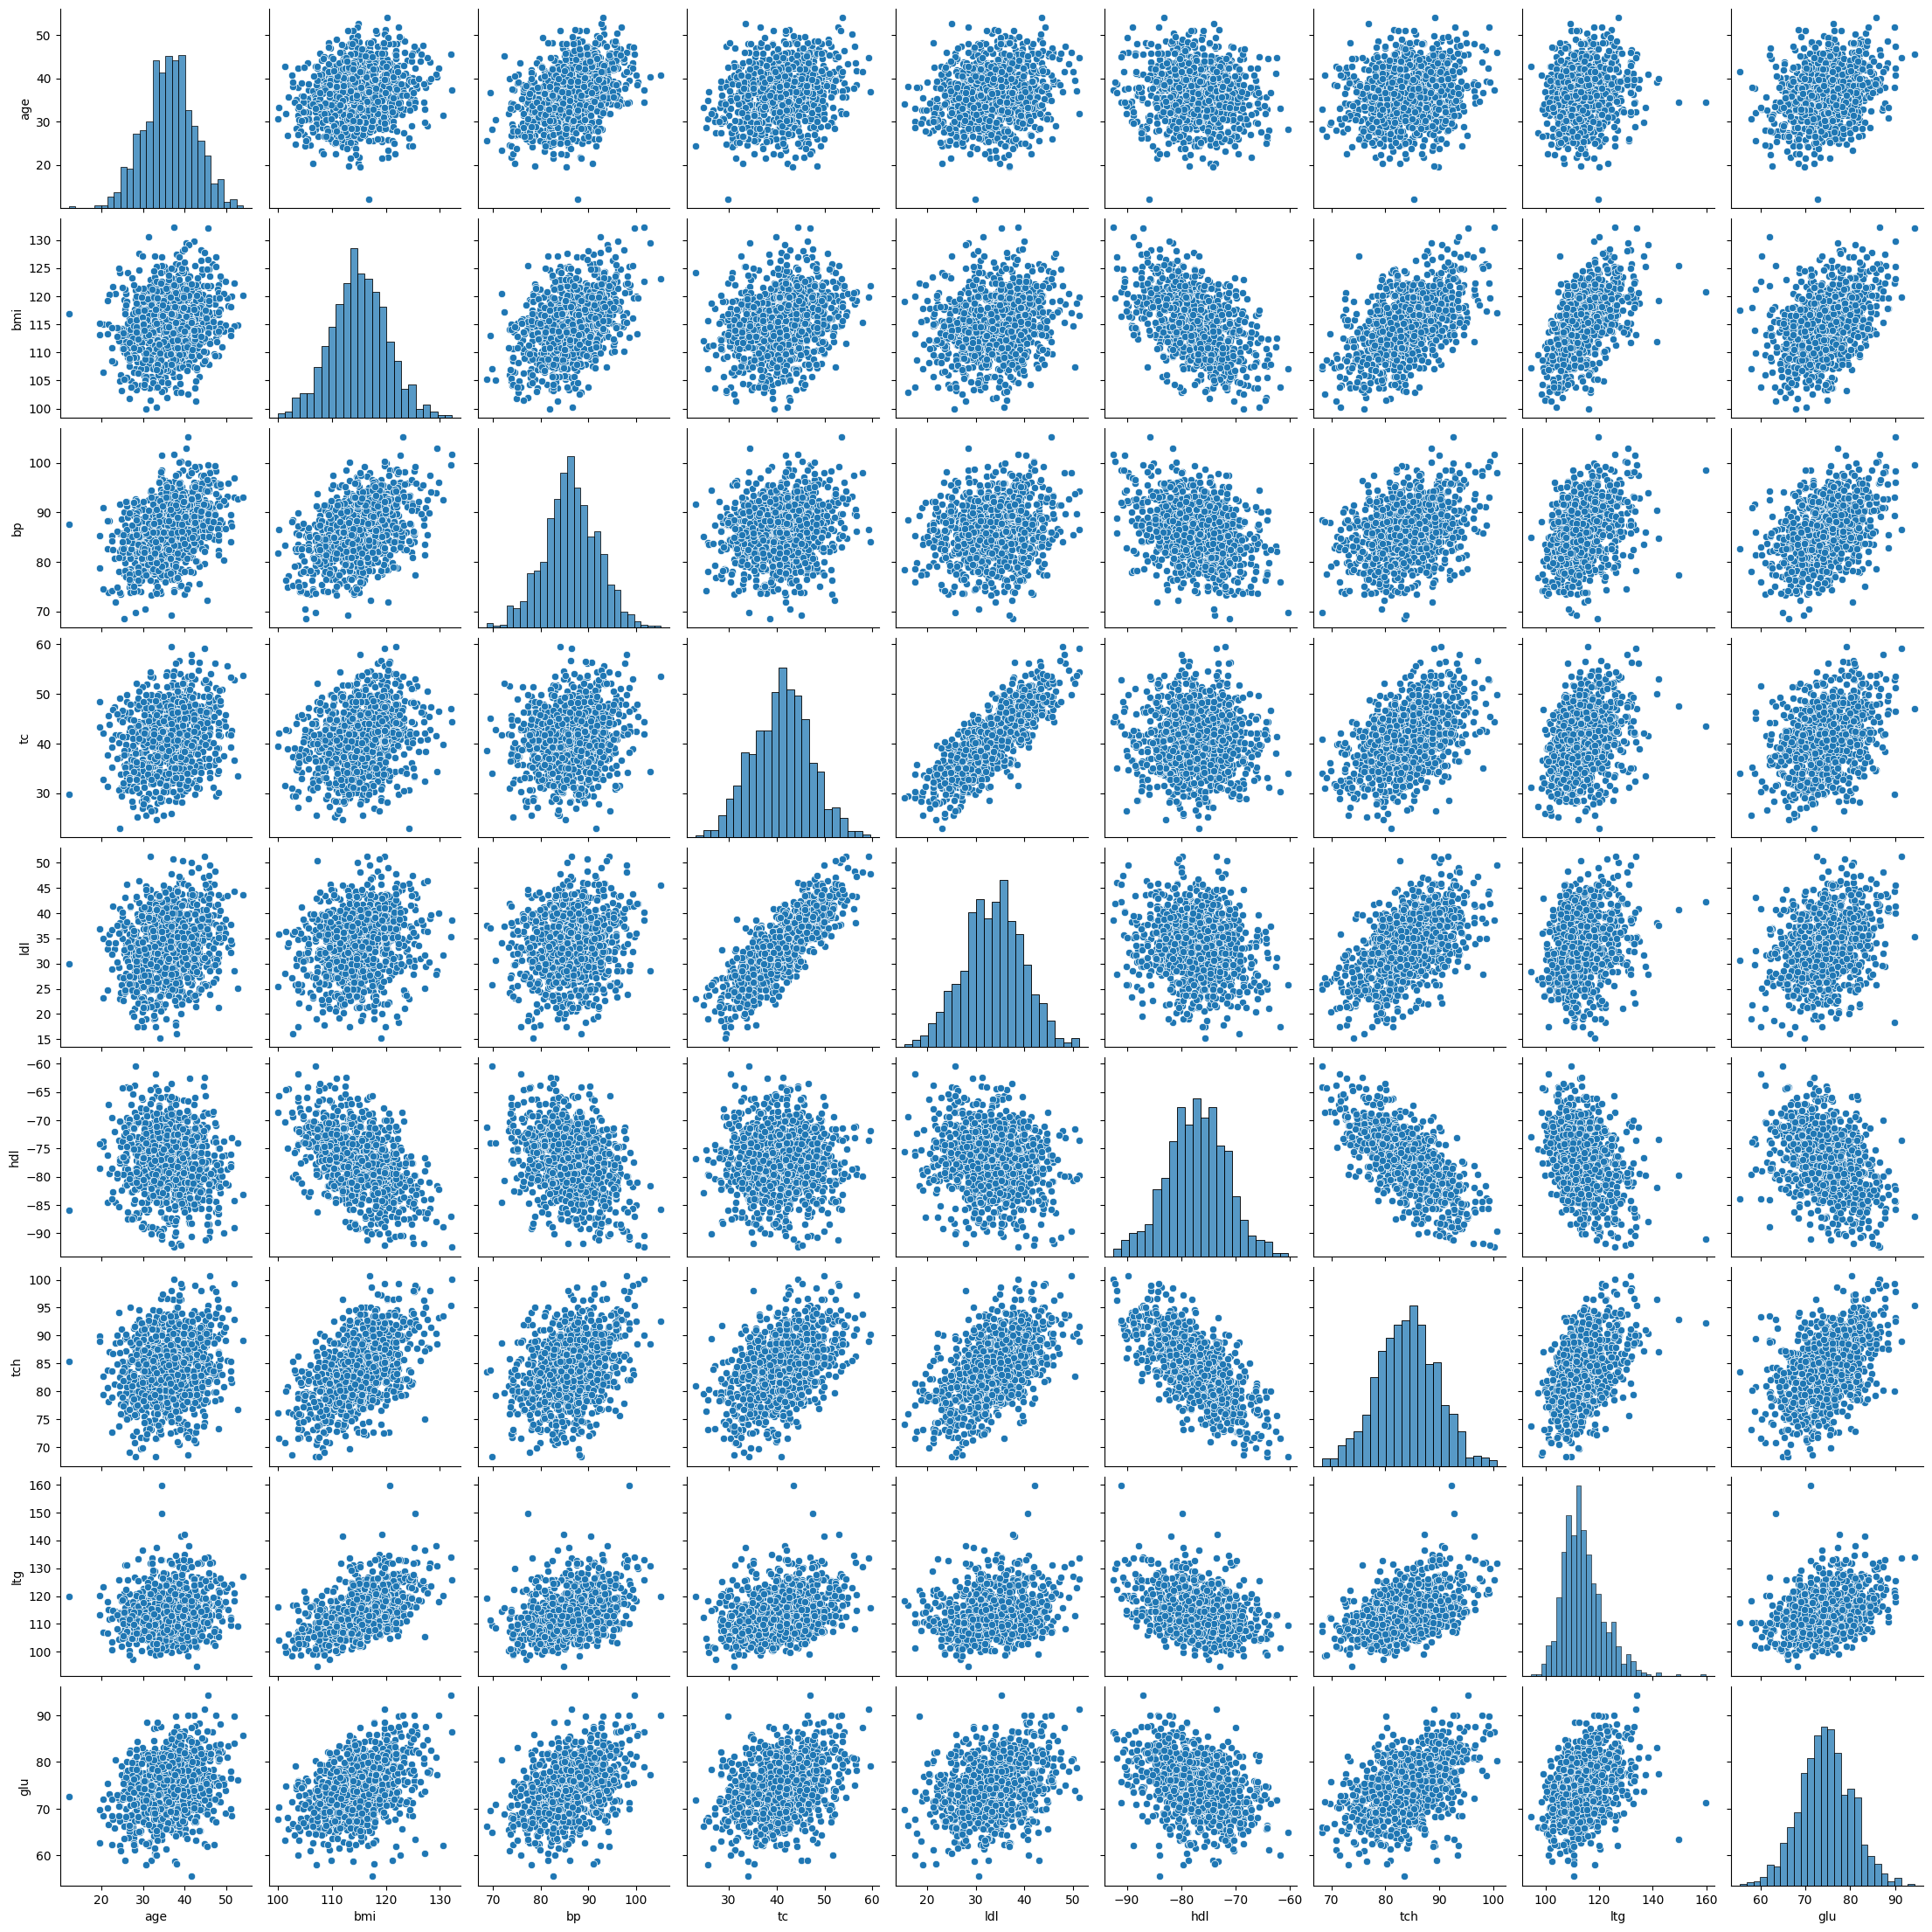

In [162]:
#Fazendo um pairplot
sns.pairplot(df_diferenca)

Repare na sexta linha ou sexta coluna, representando o HDL: os padrões dos gráficos de dispersão indicam que as diferenças médias em y previsto de pessoas que estão no quarto quartil e no primeiro quartil para HDL estão negativamente correlacionadas com as outras variáveis. Enquanto há uma correlação positiva entre todas as outras variáveis

# Criando um Mapa de Correlação (Cluster)

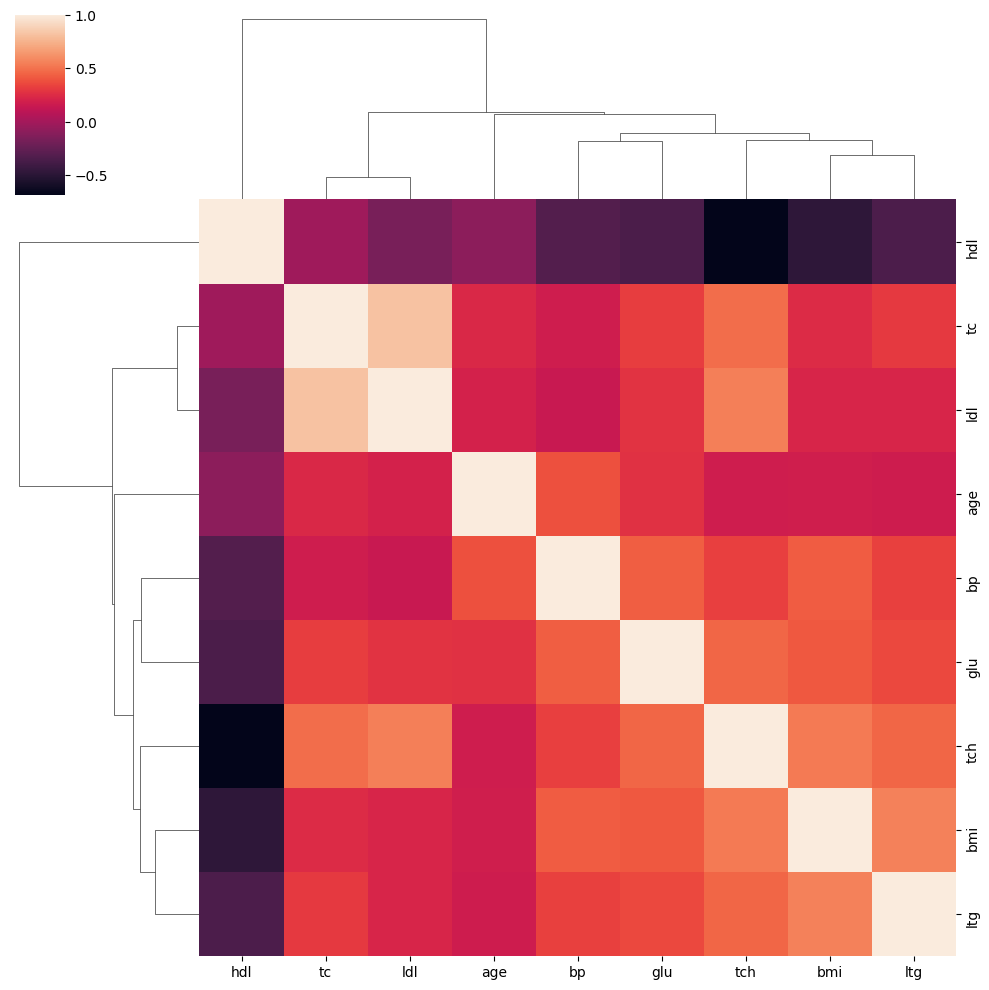

In [163]:
sns.clustermap(df_diferenca.corr())

Esse gráfico representa a matriz de correlação das diferenças. Nele as variáveis são agrupadas e ordenadas de acordo com sua correlação.

A cor púrpura escura representa correlação negativa associada entre a variável HDL, e a cor rosa pálida representa correlação positiva.

In [164]:
#Podemos converter o dataframe para um formato mais conveniente
#O nosso esta no formato wide (amplo), queremos por no longo
df_diferenca_long = df_diferenca.melt(value_name = 'y_diferenca',
                                      value_vars = ['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'])
df_diferenca_long.head()

variable  y_diferenca
0      age    46.925509
1      age    32.734315
2      age    48.071480
3      age    33.792622
4      age    31.449416

<Axes: xlabel='variable', ylabel='y_diferenca'>

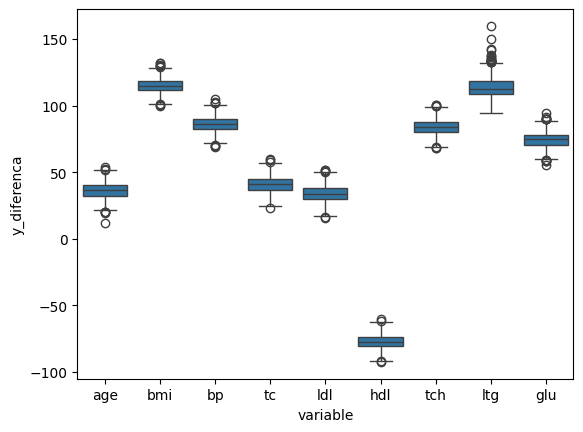

In [165]:
# Criando um bloxplot
sns.boxplot(x="variable",y="y_diferenca",data = df_diferenca_long)

Esse gráfico de Boxplot sugere que quanto maiores os valores dos preditores, pior será a progressão da doença do paciente.

Por outro lado, quanto maior o valor de HDL, melhor será o resultado do paciente

## Análise de Senstitivdade

A análise de senstividade nos ajuda a compreender o impacto da variedade de dados de entrada

Ao resumir os resultados de análise de sensibilidade usando tabelas ou gráficos, podemos verificar e ilustrar claramente padrões ou tendências.

# Uma pergunta comum desse tipo de análise:

Se aumentarmos ou diminuirmos os valores para bmi e hld usando a simulação, como os valores previstos para y irão mudar ?


In [193]:
# Definindo nossos parâmetros
cov_df = df[['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']].cov()
media_df = df[['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']].mean()
#Fazendo uma função da simulação
def simulando_bmi_hdl(cov_df,lista_medias):
  ##############################################
  # Argumentos de Entrada:Cov_df/lista média   #
  # retorna média dos valores previstos para y #
  # Saída: np.mean(ys)                         #
  ##############################################
  ys = [] #lista vazia
  for i in range(50):
      results_sims = st.multivariate_normal.rvs(mean= lista_medias,
                                                size = 500, cov = cov_df)
      df_results_sim = pd.DataFrame(results_sims,
                                    columns=['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'])
      #Rodando o modelo determínistico
      reg_model(df_results_sim)
      y = np.mean(df_results_sim['y_previsto'])
      ys.append(y)
  return (np.mean(ys))

In [194]:
# Vamos percorrer um intervalo de valores de HDL médios incrementados e um valor de IMC médios incrementados
hdl = [] #Lista vazia
bmi = []
y_simu = []
#Mantemos a covariância inalterada
#Mas alteramosa média
cov_df = df[['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']].cov()
media_df = df[['age', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']].mean()
for var_medio_bmi in np.arange(-7,11,3):
    for var_medio_hdl in np.arange(-20,50,30):
        lista_medias = media_df + np.array([0, var_medio_bmi, 0, 0, 0, var_medio_hdl, 0, 0, 0])
        hdl.append(var_medio_hdl)
        bmi.append(var_medio_bmi)
        media_y = simulando_bmi_hdl(cov_df, lista_medias) # chama a função
        y_simu.append(media_y)
df_analise_sensitividade = pd.concat([pd.Series(hdl), pd.Series(bmi) , pd.Series(y_simu)],axis = 1)
df_analise_sensitividade.columns = ['aumento_hdl','aumento_bmi','y']

In [195]:
#Classificando df_sa
df_analise_sensitividade.sort_values(by = ['aumento_hdl', 'aumento_bmi']).pivot(index = 'aumento_hdl',
                                                      columns = 'aumento_bmi',
                                                      values = 'y').style.background_gradient(
                                                      cmap=sns.light_palette('red',as_cmap = True))

Perceba que após classificarmos as colunas e geramos a tabela acima. Onde as colunas representam incrementos distintos para o IMC e as linhas incrementos disintos para o HDL

Colocando o tema de gradiente, quanto mais escuro o vermelho, quanto maiores os valores números de y, e pior o resultado do paciente

<Axes: xlabel='aumento_hdl', ylabel='aumento_bmi'>

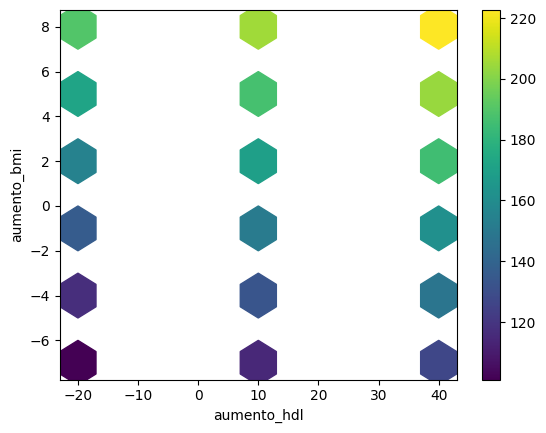

In [133]:
## Gráfico de Hexbin
df_analise_sensitividade.plot.hexbin(x='aumento_hdl',
                                    y ='aumento_bmi',
                                    C = 'y',
                                    reduce_C_function = np.mean, #reduz todos os valores em um bin para um único número usando a média
                                    gridsize = 10, cmap = 'viridis', #Gridsize define o tamanho dos hexagonos, cmap indica o esquema de cores
                                    sharex= False) #Sharex precisa ser definido como falso para que os valores de x apareçam

Neste gráfico quanto mais escura são as cores, menores os valores númericos de y previsto. O gráfico mostra as mesmas conclusões do dataframe Quando maior o HDL, menor os valores de y previsto, sendo assim melhores resultados do paciente Com o aumento do IMC, há piores resultados

### REFERÊNCIAS BIBLIOGRÁFICAS UTILIZADAS #####

* Efron, B.; Hastie, T.; Johnstone, I.; Tibshirani, R. Least angle regression (with discussions). *The Annals of Statistics*, v. 32, 2004.

* Ross, S. Probabilidade: Um Curso Moderno com Aplicações. Bookman, 2009. Disponível em: [https://books.google.com.br/books?id=ZKXtwsmyPFcC](https://books.google.com.br/books?id=ZKXtwsmyPFcC). Acesso em: 14 de abril de 2024.

* Weber, I. Monte Carlo Simulations in Python. DataCamp, [Online Course](https://www.datacamp.com/courses/monte-carlo-simulations-in-python), acessado em: 14 de abril de 2024.